# 🗂️ **1. Perkenalan Dataset**


## 🔍 **Menjelajahi Bayangan Finansial: Analisis Clustering untuk Deteksi Penipuan**

> 📌 **Akses Dataset**: [Bank Transaction Dataset for Fraud Detection di Kaggle](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

### 💳 **Menyelami Dunia Transaksi Perbankan**

Di era digital, setiap gesek, ketuk, dan klik menghasilkan sidik jari di lautan data keuangan yang luas. Di balik aliran kredit dan debit yang tampak biasa, tersembunyi lanskap di mana transaksi yang sah berdampingan dengan upaya penipuan yang canggih. **Dataset Transaksi Bank untuk Deteksi Penipuan** membuka jendela ke ekosistem kompleks ini, memberikan kita 2.512 momen transaksi yang membeku dalam waktu—masing-masing berpotensi menceritakan kisah aktivitas keuangan normal atau sesuatu yang lebih mengkhawatirkan.

> "Penipuan paling canggih tidak terdeteksi melalui kebetulan—mereka terungkap melalui analisis metodis dan pengenalan pola."

Proyek ini memulai perjalanan analitis melalui transaksi keuangan, memanfaatkan teknik clustering untuk mencapai skor silhouette melebihi 0,7—ambang batas yang memisahkan pengelompokan acak dari pola bermakna. Ketika kita melampaui ambang ini, kita tidak hanya menciptakan cluster matematis; kita mengembangkan penjaga digital yang mampu mengenali tanda tangan halus dari aktivitas penipuan.

### 📊 **Dataset: Permadani Finansial Digital**

Dataset kita menyajikan permadani kaya perilaku keuangan, menangkap 2.512 transaksi di 16 dimensi berbeda:

**Pengenal Transaksi:**
* Setiap transaksi membawa **TransactionID** unik, paspor digital yang bergerak melalui sistem keuangan
* Setiap transaksi terkait dengan **AccountID**, memungkinkan kita melacak pola perilaku sepanjang waktu

**Dimensi Keuangan:**
* **TransactionAmount**: Detak jantung moneter dari setiap interaksi
* **AccountBalance**: Keadaan keuangan setelah setiap transaksi, menceritakan kisah akumulasi atau pengurangan
* **TransactionType**: Arah fundamental aliran uang—kredit atau debit

**Elemen Kontekstual:**
* **Location**: Jangkar geografis setiap transaksi
* **DeviceID** dan **IP Address**: Jejak digital yang menghubungkan virtual ke fisik
* **MerchantID**: Rekanan komersial, mengungkapkan pola preferensi pelanggan atau penyimpangan mencurigakan
* **Channel**: Media transaksi—dari kunjungan cabang tradisional hingga antarmuka digital

**Faktor Manusia:**
* **CustomerAge** dan **CustomerOccupation**: Dimensi demografis yang membentuk perilaku keuangan
* **LoginAttempts**: Sinyal potensial akses otentik atau sesuatu yang lebih jahat
* **TransactionDuration**: Waktu yang dihabiskan dalam proses transaksi, di mana anomali mungkin bersembunyi

### 🎯 **Misi Clustering Kita**

Bintang utara analitis kita jelas—untuk mencapai skor silhouette di atas 0,7 melalui analisis clustering yang cermat. Ini bukan hanya ambang statistik; ini mewakili kemampuan kita untuk:

* Mengidentifikasi pengelompokan alami dalam perilaku keuangan yang memisahkan yang biasa dari yang mencurigakan
* Mengungkap hubungan tersembunyi antara atribut transaksi yang mungkin menandakan aktivitas penipuan
* Membangun fondasi untuk model prediktif yang dapat beroperasi pada kecepatan keuangan digital
* Menciptakan kerangka kerja yang dapat beradaptasi dengan strategi penipuan yang terus berkembang

### 🔮 **Di Balik Angka: Dampak Analisis Kita**

Ketika kita melihat melampaui titik data, algoritma, dan skor silhouette, kita menemukan signifikansi nyata dari pekerjaan ini. Deteksi penipuan yang efektif berarti:

* Melindungi individu dari kesulitan finansial dan emosional akibat menjadi korban penipuan
* Menjaga integritas sistem keuangan yang menopang ekonomi modern
* Mengurangi perkiraan 30 miliar dolar AS yang hilang setiap tahun akibat penipuan keuangan
* Memungkinkan inovasi keuangan dengan menciptakan lingkungan yang aman untuk teknologi baru

Saat kita menyelami lautan transaksi ini, kita tidak hanya memanipulasi data—kita mengembangkan perisai yang melindungi ekosistem keuangan dan orang-orang yang mengandalkannya.

*Apakah Anda siap untuk mengungkap pola tersembunyi dalam lanskap keuangan ini?* 💰

# **🗂 2. Import Library**

📂 Jadi ini adalah beberapa **library** yang akan kita gunakan dalam penjelajahan ini 🕵

In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import warnings
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **📥 3. Memuat Dataset**

Pada tahap ini, kita akan memuat dataset ke dalam **DataFrame** menggunakan pustaka **Pandas**. Setelah proses loading selesai, kita akan memeriksa **kesesuaian dataset** yang telah diunduh dengan **informasi yang tersedia pada platform Kaggle**, yaitu sumber asli dataset ini.

📌 **Tujuan utama dari langkah ini:**
- ✅ Memastikan dataset berhasil dimuat dengan **benar**
- ✅ Memverifikasi struktur dataset **sesuai dengan deskripsi aslinya di Kaggle**
- ✅ Melihat **gambaran awal** dataset sebelum dilakukan analisis lebih lanjut

In [339]:
df = pd.read_csv('data/bank_transactions_data_2.csv')

print("============= Memeriksa Kesesuaian Data dengan Informasi Dataset =============")
print(df.info())

============= Memeriksa Kesesuaian Data dengan Informasi Dataset =============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13 

Setelah dilakukan pengecekan, dataset ini **sesuai** dengan **deskripsi yang ada di Kaggle**, sehingga kita dapat melanjutkan ke tahap eksplorasi lebih lanjut. 🚀

# 🔍 **4. Exploratory Data Analysis (EDA)**  

Sebelum masuk ke tahap pemodelan, saya perlu memahami dataset ini dengan lebih dalam melalui **Exploratory Data Analysis (EDA)**. Tujuannya? Untuk menemukan pola tersembunyi, mengidentifikasi anomali, serta memahami struktur data secara keseluruhan. Let's dive in! 🚀  

📌 **1. Mengenal Struktur Data**  
Langkah pertama, saya akan melihat bagaimana bentuk dataset ini:  
✅ Berapa jumlah baris dan kolomnya?  
✅ Apa saja tipe data di setiap kolom—numerik atau kategorikal?  
✅ Apakah ada data yang perlu diubah formatnya agar lebih mudah diolah?  

⚠️ **2. Menangani Data yang Hilang**  
Data yang hilang bisa menjadi jebakan dalam analisis, jadi saya harus:  
🔍 Mengecek apakah ada *missing values*.  
🛠️ Menentukan solusi terbaik—apakah mengisi dengan nilai tertentu atau menghapusnya agar tidak mengganggu analisis.  

📊 **3. Menganalisis Distribusi & Korelasi**  
Selanjutnya, saya ingin memahami lebih dalam tentang bagaimana data ini terdistribusi dan bagaimana hubungan antar variabelnya:  
📈 Untuk variabel numerik, saya akan melihat statistik deskriptif serta membuat histogram atau boxplot.  
🔗 Saya juga akan mengecek korelasi antar variabel menggunakan *heatmap* atau *scatter plot* untuk melihat apakah ada pola menarik yang bisa dimanfaatkan.  

🎨 **4. Memvisualisasikan Data**  
Karena gambar berbicara lebih banyak dari angka, saya akan:  
📊 Membuat diagram batang untuk melihat distribusi variabel kategorikal.  
🌡️ Menggunakan *heatmap* untuk memahami hubungan antar variabel dengan lebih jelas.  
👀 Mungkin juga menambahkan *pairplot* untuk melihat hubungan antar fitur secara visual.  

Dengan melakukan EDA ini, saya berharap bisa mendapatkan wawasan yang lebih tajam dan siap melangkah ke tahap analisis berikutnya! 🚀🔬

Sebelum itu mari kita lakukan beberapa **konfigurasi tampilan** dan **konfigurasi gaya visualisasi** agar visualisasi **konsisten**, sehingga lebih enak dilihat mata.

In [340]:
# Pengaturan untuk tampilan
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
warnings.filterwarnings('ignore')

# Style untuk visualisasi agar konsisten ga kayak DPR
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

## 🔍 **Data Peeking 101**  

Sebelum menyelam lebih dalam , kita perlu **mengintip sekilas** struktur dan isinya. Ini seperti mengenal medan sebelum bertempur! 🏹💡  

Tahapan ini meliputi:  
📌 **Cek tampilan awal** → `head()`  
📌 **Lihat ringkasan info** → `info()`  
📌 **Ukurannya seberapa besar?** → `shape()`  
📌 **Ada data yang hilang?** → `isnull().sum()`  
📌 **Distribusi statistik** → `describe()`  
📌 **Tipe data kolom** → `dtypes()`  

Dengan "mengintip" data di awal, kita bisa menghindari jebakan seperti **missing values, anomali, atau tipe data yang nggak sesuai**, sebelum lanjut ke tahap analisis yang lebih mendalam. 🚀

### 📌 **Cek tampilan awal** → `head()`

Oke sekarang kita akan melihat 5 data teratas dari dataset ini. Tujuannya biar kita dapat gambaran awal dataset.

In [341]:
print("5 Baris Pertama Dataset:")
df.head()

5 Baris Pertama Dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Dari keluaran di atas, dapat dilihat bahwa datasetnya **aman aja si**. Beberapa info menarik mungkin, disini kita terdapat 2 kolom **ID** yang mana ini seharusnya kita `drop`jika ingin melakukan **clustering**. 

Oke nice, **one insight** berhasil didapatkan bolo 🚀

### 📌 **Lihat ringkasan info** → `info()` 

Selanjutnya mari lihat info dataset, disini kita bisa cek ada **missing values** atau **ketidak sesuaian tipe data** atau tidak.

In [342]:
print("\nInformasi Struktur Data:")
df.info()


Informasi Struktur Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14

Dapat dilihat diatas, hal yang mungkin sedikit masalah adalah kolom `TransactionType` bertipe **object**, seharusnya dia bertipe **Datetime** yang sesuai dengan format tanggal.

We'll deal with this later. 🪛

### 📌 **Distribusi statistik** → `describe()`

Selanjutnya, kita akan melihat persebaran dataset. Pada tahap ini kita akan melihat apakah data numerik itu tersebar secara baik atau tidak.

In [343]:
print("\nDeskripsi Statistik Kolom Numerik:")
display(df.describe())


Deskripsi Statistik Kolom Numerik:


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.00,2512.00,2512.00,2512.00,2512.00
mean,297.59,44.67,119.64,1.12,5114.30
std,291.95,17.79,69.96,0.60,3900.94
min,0.26,18.00,10.00,1.00,101.25
25%,81.89,27.00,63.00,1.00,1504.37
50%,211.14,45.00,112.50,1.00,4735.51
75%,414.53,59.00,161.00,1.00,7678.82
max,1919.11,80.00,300.00,5.00,14977.99


Oke, dari statistik deskriptif ini, kita bisa lihat beberapa hal menarik! 💡  

🔹 **Jumlah transaksi rata-rata** sekitar **$297**, tapi ada transaksi kecil banget **($0.26)** sampai yang hampir **$2000**. Ini berarti ada variasi yang cukup besar dalam jumlah transaksi! 📊  

🔹 **Usia pelanggan** berkisar antara **18 hingga 80 tahun**, dengan rata-rata **44 tahun**. Bisa jadi mayoritas pengguna adalah orang dewasa dengan pengalaman finansial yang cukup.  

🔹 **Durasi transaksi** bervariasi dari **10 detik hingga 300 detik**, dengan rata-rata sekitar **2 menit**. Mungkin ada beberapa transaksi yang butuh verifikasi tambahan sehingga memakan waktu lebih lama.  

🔹 **Percobaan login** mayoritas hanya **1 kali**, tapi ada yang sampai **5 kali**! Bisa jadi indikasi upaya login yang mencurigakan atau pengguna yang lupa password. 🕵️‍♂️  

🔹 **Saldo akun pelanggan** punya rentang yang gila, dari **$101** hingga hampir **$15.000**! Ini menunjukkan ada berbagai tipe pengguna, dari yang memiliki saldo kecil hingga nasabah dengan dana besar.  

Dari sini, kayaknya kita perlu cek lebih lanjut apakah ada outlier yang bisa berpengaruh ke clustering nanti.

Tetapi sebelum itu, mari cek **deskripsi untuk kolom kategorikal** terlebih dahulu. 

In [344]:
print("\nDeskripsi Kolom Kategorikal:")
display(df.describe(include=['object']))


Deskripsi Kolom Kategorikal:


,TransactionID,AccountID,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerOccupation,PreviousTransactionDate
count,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512,2512
unique,2512,495,2512,2,43,681,592,100,3,4,360
top,TX000001,AC00362,2023-04-11 16:29:14,Debit,Fort Worth,D000697,200.136.146.93,M026,Branch,Student,2024-11-04 08:09:17
freq,1,12,1,1944,70,9,13,45,868,657,16


Dari deskripsi kolom di atas , kita bisa liat bahwa mayoritas transaksi adalah **Debit** (🔄 1944 kali) dan dilakukan melalui **Branch** (🏦 868 kali). Lokasi transaksi cukup beragam dengan **43 lokasi**, namun **Fort Worth** paling sering muncul (📍 70 kali). Pekerjaan pelanggan terdiri dari **4 kategori**, dengan **Student** sebagai yang terbanyak (🎓 657 kali). Selain itu, ada **100 MerchantID**, di mana satu merchant sering digunakan (🛒 45 kali). Beberapa **IP Address** dan **DeviceID** muncul lebih sering, yang bisa menjadi indikasi aktivitas menarik untuk ditelusuri lebih lanjut. 🚀

### 📌 **Ukurannya seberapa besar?** → `shape()`

Sekarang mari lihat **ukuran dataset** ini 📐

In [345]:
print(f"\nDataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom")


Dataset memiliki 2512 baris dan 16 kolom


Oke good, sesuai dengan deskripsi di kaggle.

### 📌 **Ada data yang hilang?** → `isnull().sum()` 

Sekarang mari kita lihat apakah data memiliki **missing values** atau tidak secara komprehensif, dan jika ada kita coba **visualisasikan 📊**

> (walaupun udah tau gaada dari df.info hehe 😂)

In [346]:
# Memeriksa missing values
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Membuat DataFrame untuk menampilkan missing values dengan lebih baik
missing_df = pd.DataFrame({
    'Jumlah Missing Values': missing_values,
    'Persentase (%)': missing_percent
})

# Menampilkan hanya kolom yang memiliki missing values
missing_df_with_values = missing_df[missing_df['Jumlah Missing Values'] > 0]

if missing_df_with_values.empty:
    print("Tidak ada missing values dalam dataset!")
else:
    print("Kolom dengan Missing Values:")
    display(missing_df_with_values.sort_values('Jumlah Missing Values', ascending=False))
    
    # Visualisasi missing values jika ada
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Visualisasi Missing Values', fontsize=14)
    plt.tight_layout()
    plt.show()

Tidak ada missing values dalam dataset!


### 📌 **Tipe data kolom** → `dtypes()`  

Disini kita akan lihat apakah ada tipe data yang tidak sesuai atau tidak.

In [347]:
print("Tipe Data:")
display(df.dtypes)

Tipe Data:


TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

Sama seperti sebelumnya, masalahnya adalah kolom `TransactionType` bertipe **object**, seharusnya dia bertipe **Datetime** yang sesuai dengan format tanggal.

## 🔄 **Data Transformation Magic** ✨  

Sebelum masuk ke analisis lebih lanjut, kita harus memastikan data dalam format yang benar. Tahap ini mencakup **konversi tipe data**, **ekstraksi fitur tambahan**, dan **perhitungan selisih waktu** untuk mendapatkan wawasan lebih dalam. 📊🔍  
  
📌 **Konversi tanggal ke datetime** → `pd.to_datetime()`  
📌 **Hitung selisih waktu antar transaksi** ⏳  
📌 **Ekstrak informasi waktu (tahun, bulan, hari, jam, dll.)** 🗓️  

Dengan kita ekstrak infomasi tersebut, kita bisa melakukaan analisis yang lebih **detail** dan **komprehensif**. 👨🏼‍💻

### 📌 **Konversi tanggal ke datetime** → `pd.to_datetime()` 

Jadi kita disini akan menangani format `TransactionDate` agar sesuai. Tahap ini penting dilakukan sekarang agar dapat dilakukan analisis yang lebih detail dan komprehensif.

In [348]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

♦ Oke dapat dilihat sekarang, bahwa `TrTransactionDate` sudah memiliki tipe yang **sesuai** sekarang.

### 📌 **Hitung selisih waktu antar transaksi**⏳ 

Disini saya ingin membuat sebuah fitur baru, yaitu fitur `PreviousTransactionDate` yang akan berisi selisih waktu antar transaksi terkahir.

In [349]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df['TimeSincePreviousTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds() / 3600  # in hours

### 📌 **Ekstrak informasi waktu (tahun, bulan, hari, jam, dll.)** 🗓️  

Pada tahap ini, kita akan melakukan **feature engineering** pada kolom `TransactionDate` dengan mengekstrak berbagai informasi waktu yang penting. Ini akan membantu kita memahami pola transaksi berdasarkan **tahun, bulan, hari, jam, dan hari dalam seminggu**.

In [350]:
# Extract additional features from date
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionDayOfWeek'] = df['TransactionDate'].dt.dayofweek

## 🎭 **Cracking Categorical Codes**  

Tidak semua data berbentuk angka! Dalam tahap ini, kita mengintip **kolom kategori** untuk memahami distribusi dan pola di dalamnya. 🧐📊  

📌 **Identifikasi kolom kategori** → `df.select_dtypes(include=['object'])`  
📌 **Analisa dan visualisasi distribusi variabel kategorikal** 📊  

Dengan memahami kategori ini, kita bisa melihat pola tersembunyi dalam perilaku transaksi atau preferensi pelanggan! 🚀

### 📌 **Identifikasi kolom kategori** → `df.select_dtypes(include=['object'])` 

In [351]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")

Categorical columns: ['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']


### 📌 **Analisa dan visualisasi distribusi variabel kategorikal** 📊 

Pada tahap ini saya akan melakukan beberapa tahapan, yaitu:

🔹 **Hitung jumlah kategori unik** 🏷️  
🔹 **Visualisasi distribusi dengan bar chart** 📊  
🔹 **Tangani kategori dengan jumlah unik besar (high-cardinality)**  


Value counts for TransactionType:


TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64

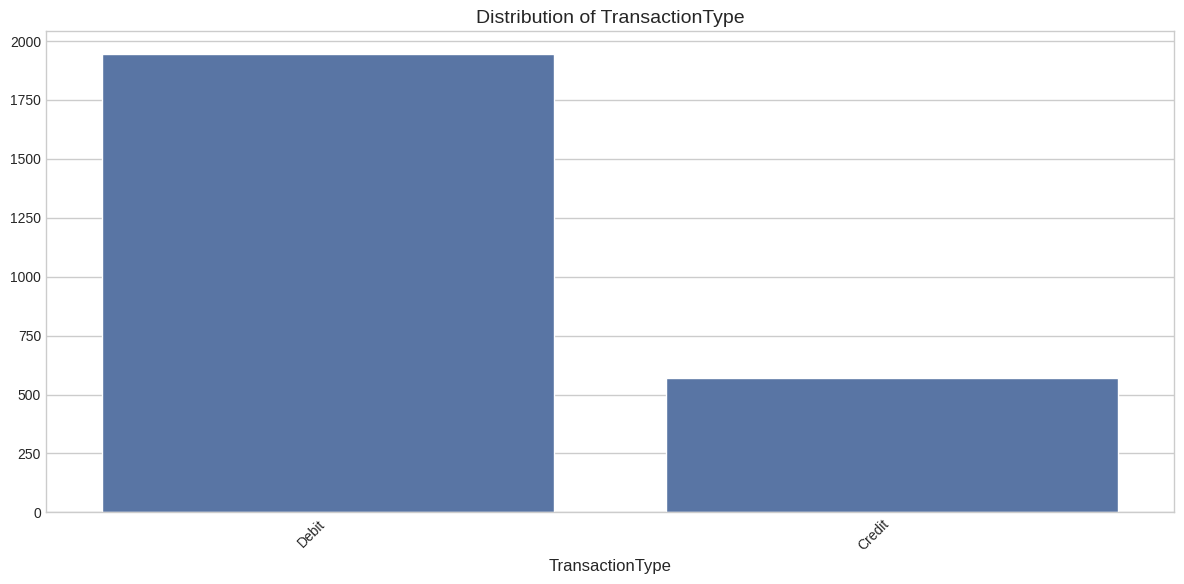


Value counts for Channel:


Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

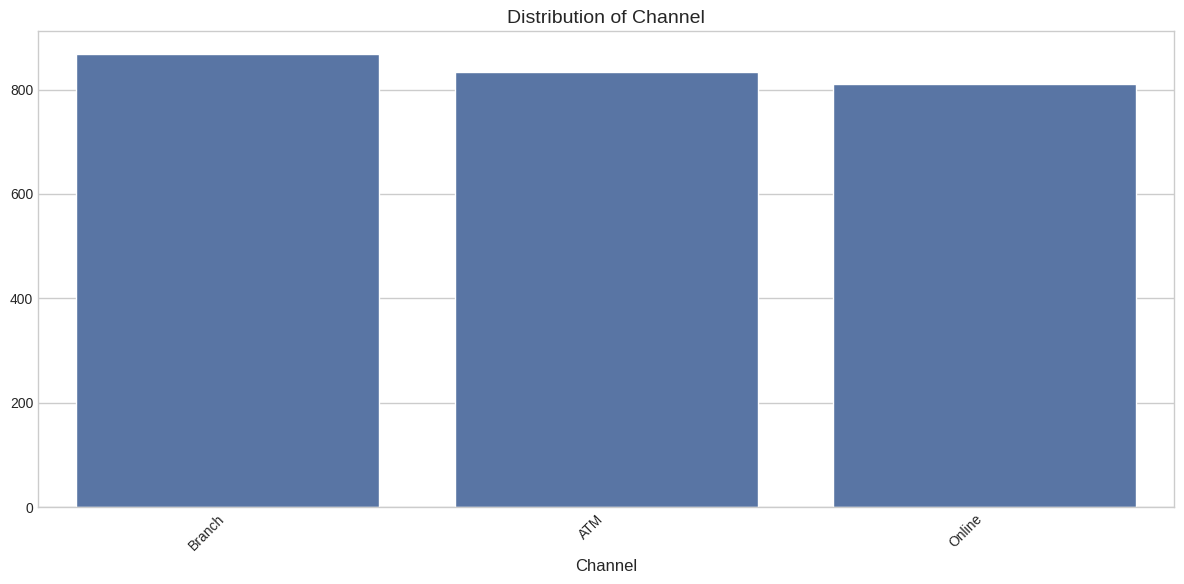


Value counts for CustomerOccupation:


CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64

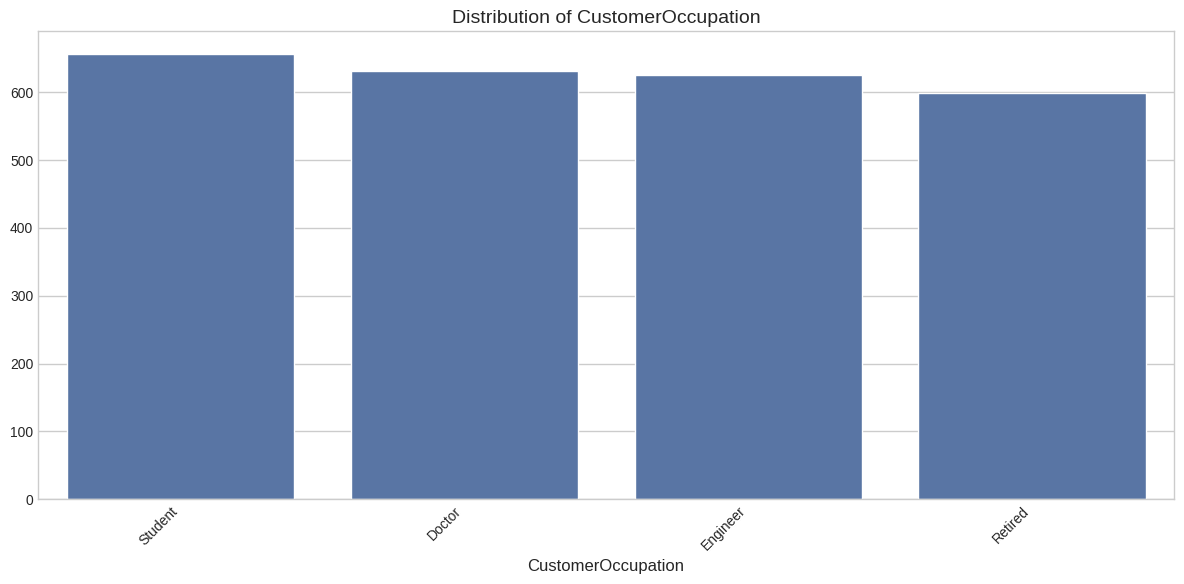


Top 10 values for Location:


Location
Fort Worth       70
Los Angeles      69
Oklahoma City    68
Charlotte        68
Tucson           67
Philadelphia     67
Omaha            65
Miami            64
Detroit          63
Houston          63
Name: count, dtype: int64

Total unique values: 43


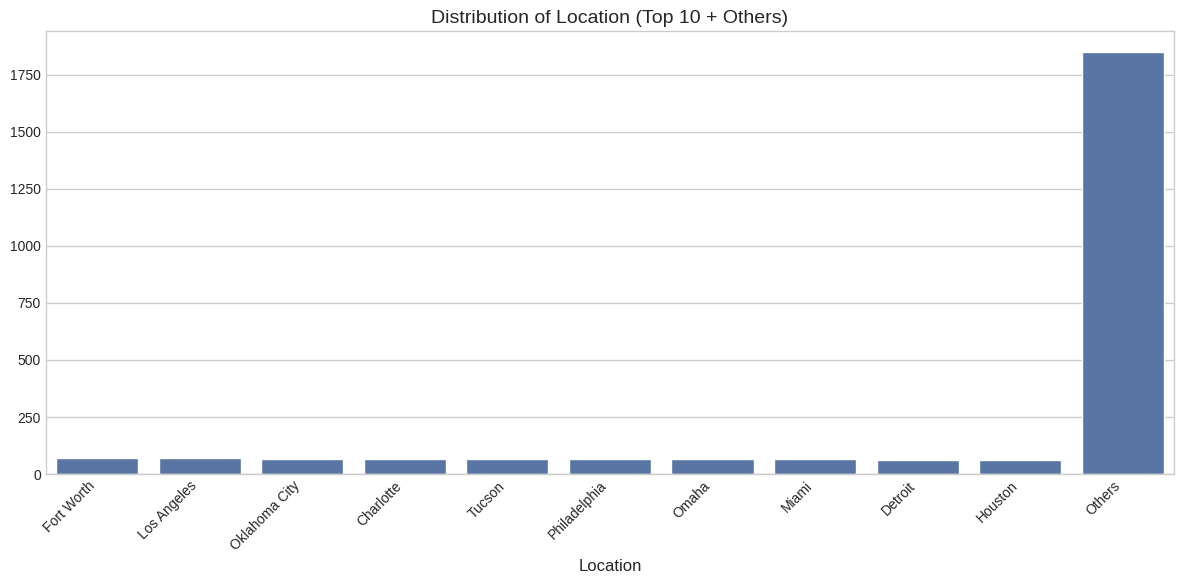


MerchantID has 100 unique values
Top 5 most common MerchantID values:


MerchantID
M026    45
M066    34
M065    33
M013    33
M014    33
Name: count, dtype: int64


DeviceID has 681 unique values
Top 5 most common DeviceID values:


DeviceID
D000697    9
D000203    9
D000548    9
D000663    9
D000142    9
Name: count, dtype: int64


IP Address has 592 unique values
Top 5 most common IP Address values:


IP Address
200.136.146.93    13
49.31.186.82      11
166.79.195.157    10
9.230.41.239      10
173.135.78.201    10
Name: count, dtype: int64

In [352]:
# Create a function to analyze and visualize categorical variables
def analyze_categorical(df, column, top_n=10):
    """
    Analyze and visualize categorical variable distribution
    
    Parameters:
    df (DataFrame): The dataset
    column (str): The column name to analyze
    top_n (int): Number of top categories to display
    """
    # Value counts
    val_counts = df[column].value_counts()
    
    # If there are many categories, show only top N
    if len(val_counts) > top_n:
        print(f"\nTop {top_n} values for {column}:")
        display(val_counts.head(top_n))
        print(f"Total unique values: {len(val_counts)}")
    else:
        print(f"\nValue counts for {column}:")
        display(val_counts)
    
    # Plot the distribution
    plt.figure(figsize=(12, 6))
    
    if len(val_counts) > top_n:
        # For columns with many categories, show only top N
        val_counts_plot = val_counts.head(top_n)
        val_counts_plot['Others'] = val_counts[top_n:].sum()
        sns.barplot(x=val_counts_plot.index, y=val_counts_plot.values)
        plt.title(f'Distribution of {column} (Top {top_n} + Others)')
    else:
        # For columns with few categories
        sns.barplot(x=val_counts.index, y=val_counts.values)
        plt.title(f'Distribution of {column}')
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Analyze key categorical variables
for col in ['TransactionType', 'Channel', 'CustomerOccupation', 'Location']:
    analyze_categorical(df, col)

# For high-cardinality categorical variables, just show counts
high_cardinality_cols = ['MerchantID', 'DeviceID', 'IP Address']
for col in high_cardinality_cols:
    print(f"\n{col} has {df[col].nunique()} unique values")
    print(f"Top 5 most common {col} values:")
    display(df[col].value_counts().head(5))

**📊 Pola Transaksi**
Mayoritas transaksi adalah **Debit** (1.944), jauh lebih banyak dibandingkan **Credit** (568) dengan rasio sekitar **3:1**. Ini menunjukkan bahwa nasabah lebih sering mengeluarkan uang daripada menerima dana—pola yang umum dalam perilaku keuangan sehari-hari. 💸  

**🌍 Saluran Transaksi**  
Nasabah memanfaatkan berbagai metode dengan cukup seimbang: **Branch** (868), **ATM** (833), dan **Online** (811). Ini menunjukkan bahwa bank telah sukses menyediakan pengalaman transaksi yang fleksibel, di mana interaksi fisik tetap populer meski layanan digital berkembang pesat. 🔄📱🏧  

**👥 Profil Nasabah**  
Dari total transaksi, empat kelompok profesi utama muncul dengan distribusi yang hampir seimbang: **Student** (657), **Doctor** (631), **Engineer** (625), dan **Retired** (599). Dengan basis nasabah yang beragam ini, bank memiliki peluang besar untuk menawarkan produk yang lebih personal dan sesuai kebutuhan masing-masing kelompok. 🎓👨‍⚕️💼👴  

**🏙️ Lokasi Transaksi**  
Sebaran transaksi sangat luas, dengan banyak terjadi di luar 10 kota utama. **Fort Worth** (70) dan **Los Angeles** (69) sedikit lebih dominan, tapi tidak ada kota yang benar-benar mendominasi. Hal ini menunjukkan bahwa layanan bank telah menjangkau berbagai wilayah tanpa ketimpangan yang mencolok. 🌎🏢  

**🛍️ Merchant, Perangkat, & IP**  
Tingginya variasi dalam **MerchantID**, **DeviceID**, dan **IP Address** menandakan bahwa transaksi tersebar luas dan tidak terpusat pada satu pedagang atau perangkat tertentu. Ini bisa menjadi indikator positif dari segi keamanan, karena tidak ada pola mencurigakan yang mendominasi. 🔐🖥️📶  

💡 **Kesimpulan**: Data menunjukkan bahwa nasabah memiliki kebiasaan transaksi yang beragam, baik dari segi metode, lokasi, hingga profil mereka. Dengan wawasan ini, bank bisa menyusun strategi layanan yang lebih personal dan meningkatkan pengalaman nasabah! 🚀

## 📈 **Number Talk**  

Sekarang saatnya memahami **kolom numerik**! 📊 Kita akan melihat distribusi angka, mendeteksi outlier, dan menemukan pola menarik di dalamnya.  

📌 **Identifikasi kolom numerik** → `df.select_dtypes(include=['int64', 'float64'])`    
📌 **Analisis dan visualisasi fitur Numerik.🏆**  

### 📌 **Identifikasi kolom numerik** → `df.select_dtypes(include=['int64', 'float64'])` 

Pilih data numerik kemudian simpan.

In [353]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

Numerical columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSincePreviousTransaction']


### 📌 **Analisis dan visualisasi fitur Numerik.🏆**

Pada tahap ini saya melakukan beberapa langkah yaitu:  

🔹 **Lihat statistik ringkasan** → `describe()`  
🔹 **Visualisasi histogram + boxplot** 🏆  
🔹 **Deteksi outlier dengan IQR method** 🚨  

In [354]:
def analyze_numerical(df, column):
    """
    Analyze and visualize numerical variable distribution
    
    Parameters:
    df (DataFrame): The dataset
    column (str): The column name to analyze
    """
    # Calculate statistics
    stats = df[column].describe()
    print(f"\nStatistics for {column}:")
    display(stats)
    
    # Create a figure with 2 subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Histogram with KDE
    sns.histplot(df[column], kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {column}')
    ax1.axvline(stats['mean'], color='r', linestyle='--', label=f'Mean: {stats["mean"]:.2f}')
    ax1.axvline(stats['50%'], color='g', linestyle='--', label=f'Median: {stats["50%"]:.2f}')
    ax1.legend()
    
    # Boxplot
    sns.boxplot(y=df[column], ax=ax2)
    ax2.set_title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()
    
    # Check for outliers using IQR method
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df)) * 100
    
    print(f"Potential outliers in {column}: {len(outliers)} rows ({outlier_percentage:.2f}%)")
    if len(outliers) > 0 and len(outliers) < 10:
        display(outliers[[column, 'TransactionID']].head(10))


Statistics for TransactionAmount:


count   2512.00
mean     297.59
std      291.95
min        0.26
25%       81.89
50%      211.14
75%      414.53
max     1919.11
Name: TransactionAmount, dtype: float64

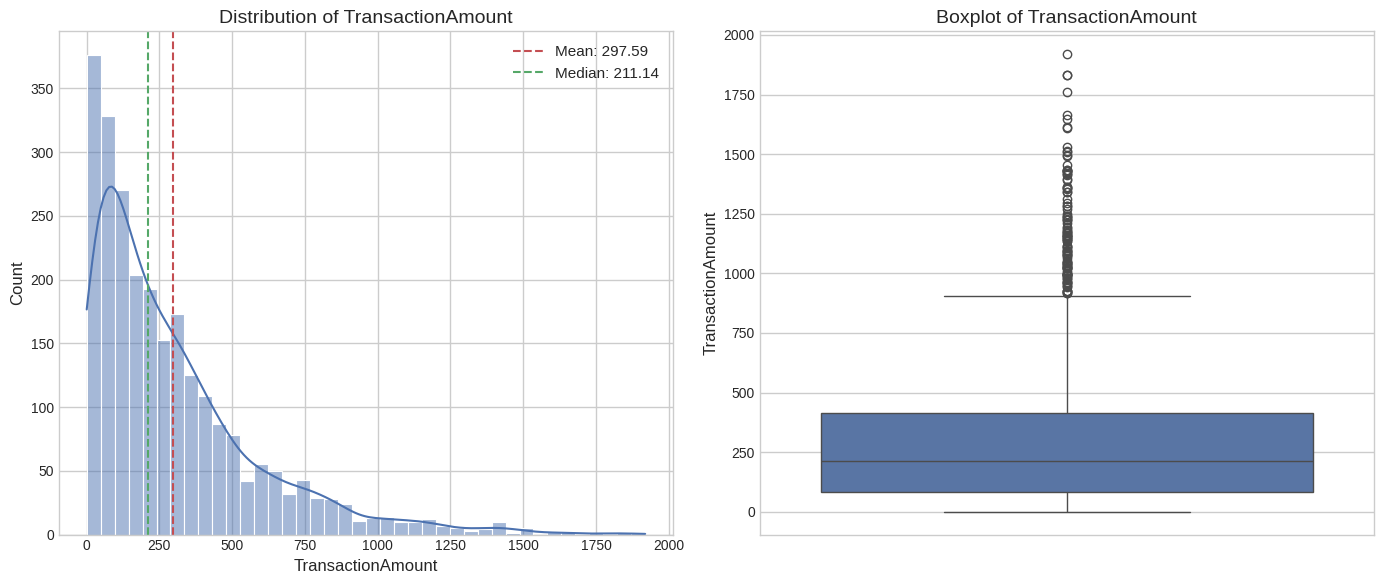

Potential outliers in TransactionAmount: 113 rows (4.50%)

Statistics for CustomerAge:


count   2512.00
mean      44.67
std       17.79
min       18.00
25%       27.00
50%       45.00
75%       59.00
max       80.00
Name: CustomerAge, dtype: float64

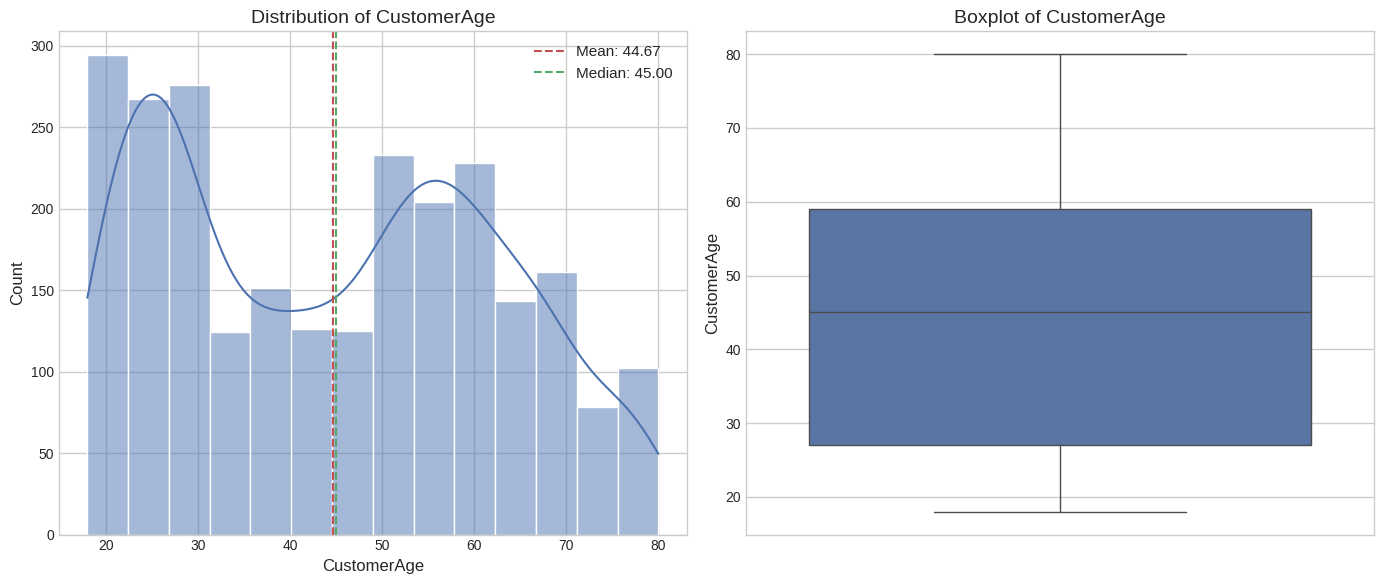

Potential outliers in CustomerAge: 0 rows (0.00%)

Statistics for AccountBalance:


count    2512.00
mean     5114.30
std      3900.94
min       101.25
25%      1504.37
50%      4735.51
75%      7678.82
max     14977.99
Name: AccountBalance, dtype: float64

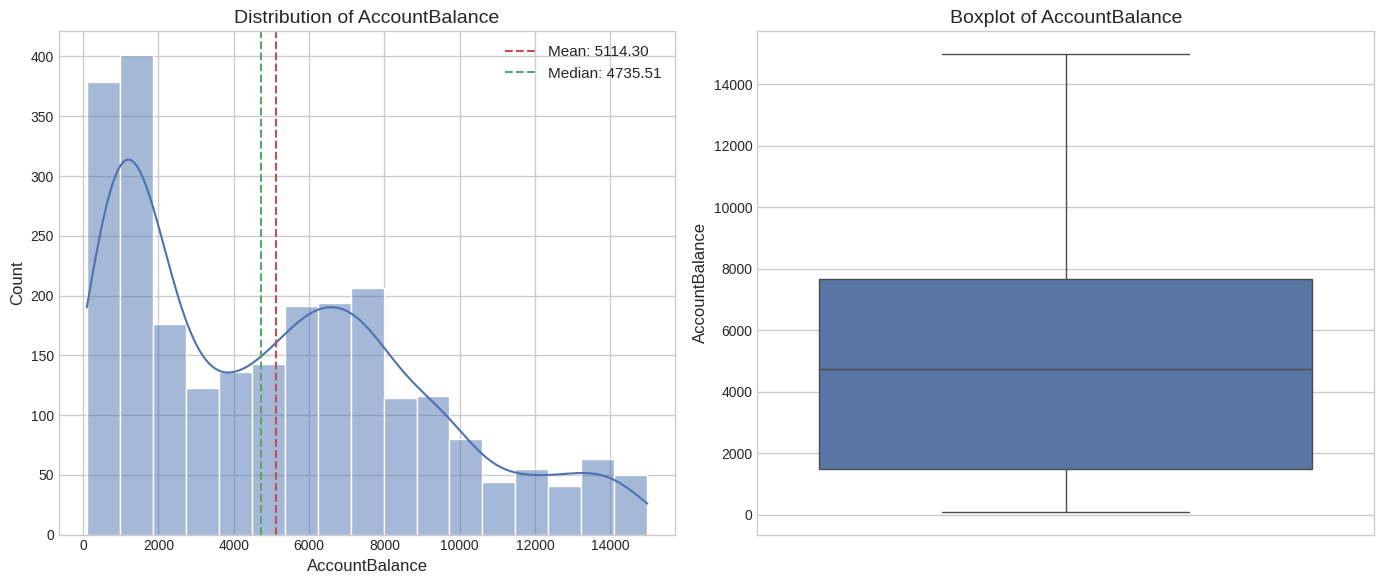

Potential outliers in AccountBalance: 0 rows (0.00%)

Statistics for TransactionDuration:


count   2512.00
mean     119.64
std       69.96
min       10.00
25%       63.00
50%      112.50
75%      161.00
max      300.00
Name: TransactionDuration, dtype: float64

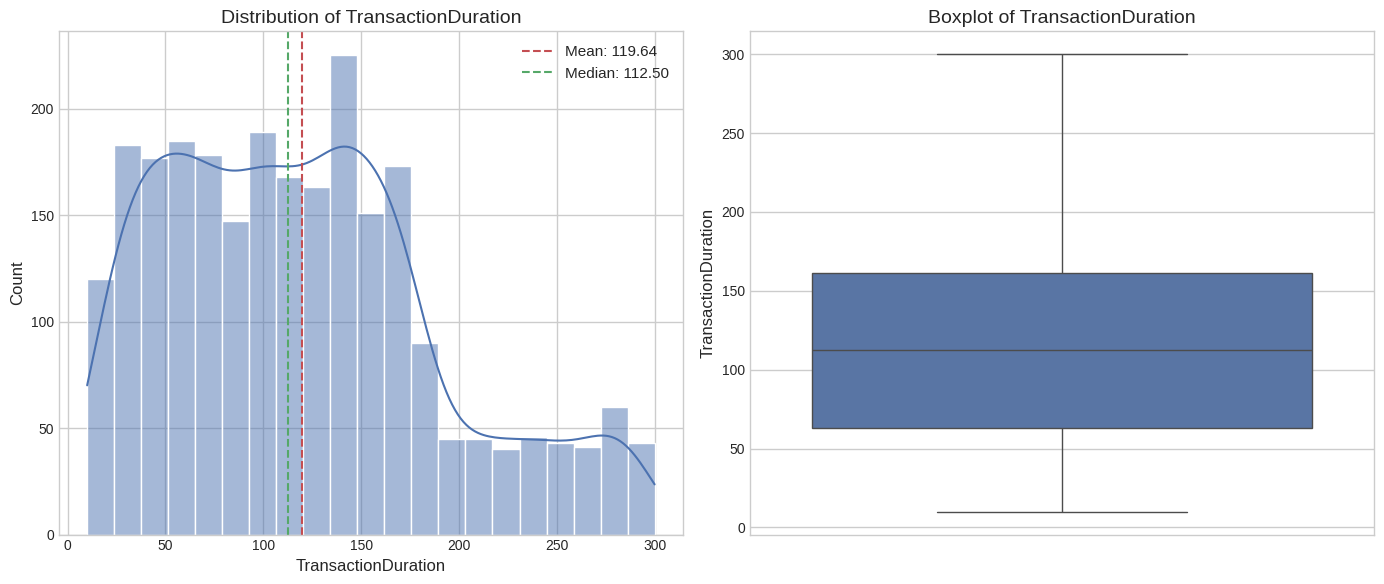

Potential outliers in TransactionDuration: 0 rows (0.00%)

Statistics for LoginAttempts:


count   2512.00
mean       1.12
std        0.60
min        1.00
25%        1.00
50%        1.00
75%        1.00
max        5.00
Name: LoginAttempts, dtype: float64

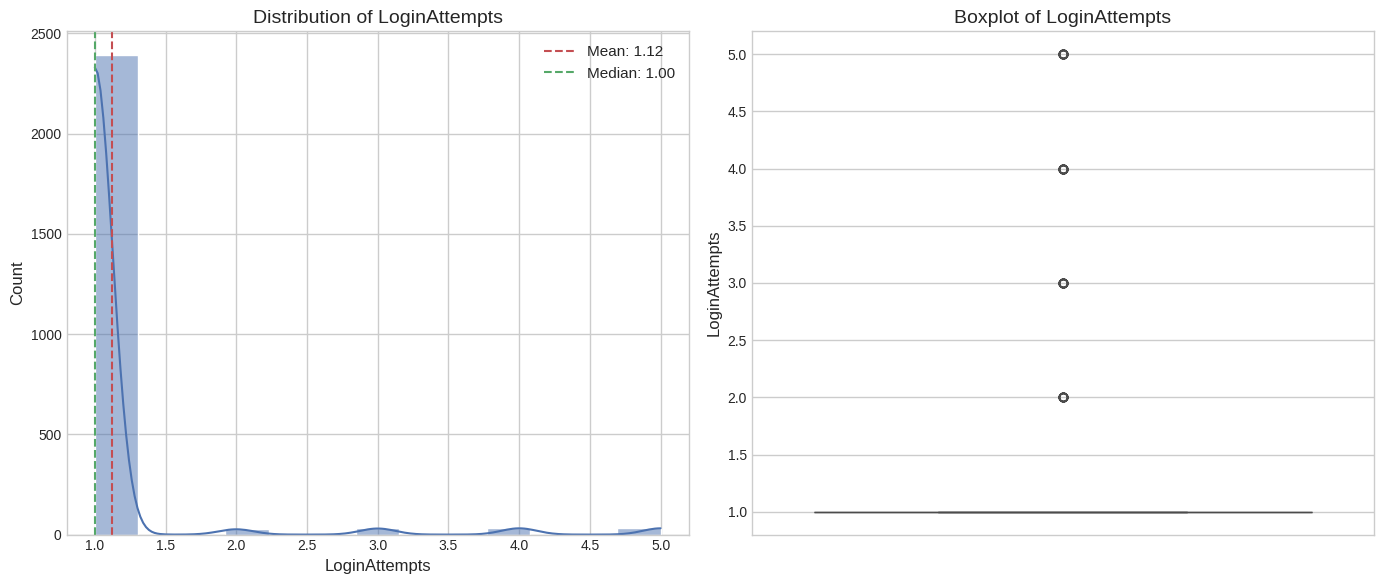

Potential outliers in LoginAttempts: 122 rows (4.86%)


In [355]:
for col in ['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionDuration', 'LoginAttempts']:
    analyze_numerical(df, col)

💰 **Jumlah Transaksi (TransactionAmount)**
Distribusi jumlah transaksi menunjukkan pola **right-skewed**, di mana mayoritas transaksi bernilai kecil, tetapi ada beberapa transaksi besar yang menarik rata-rata ke atas. **Median** transaksi hanya **$211.14**, jauh lebih rendah dari **mean** sebesar **$297.59**. Sebagian besar transaksi terjadi dalam rentang **$0-$500**, dengan konsentrasi tertinggi di **$0-$250**. **Boxplot** mengungkapkan bahwa sekitar **4.50%** transaksi merupakan **outlier**, dengan nilai transaksi hampir mencapai **$2,000**. Pola ini umum dalam keuangan, di mana transaksi kecil mendominasi, sementara segelintir transaksi besar memiliki dampak signifikan terhadap rata-rata.

🎂 **Usia Nasabah (CustomerAge)**
Distribusi usia nasabah menunjukkan pola **bimodal**, dengan dua puncak utama di usia **20-30 tahun** dan **50-60 tahun**. Ini menunjukkan bahwa bank memiliki dua kelompok nasabah utama: **milenial muda** dan **generasi senior**. **Mean** usia sebesar **44.67 tahun** hampir identik dengan **median** **45.00 tahun**, yang menunjukkan keseimbangan dalam distribusi. Tidak ada **outlier** yang terdeteksi, menandakan bahwa rentang usia nasabah berada dalam batas yang wajar.

🏦 **Saldo Rekening (AccountBalance)**
Saldo rekening menunjukkan pola **multimodal**, dengan puncak utama di rentang **$0-$2,000** dan **$6,000-$8,000**. Adanya gap antar puncak ini mengindikasikan kemungkinan **segmentasi nasabah berdasarkan kekayaan**. **Mean saldo** mencapai **$5,114.30**, lebih tinggi dari **median** **$4,735.51**, yang menunjukkan adanya sejumlah akun dengan saldo tinggi yang meningkatkan nilai rata-rata. Tidak ada **outlier** yang mencolok, bahkan akun dengan saldo tertinggi **$14,977.99** masih berada dalam batas ekspektasi normal.

⏳ **Durasi Transaksi (TransactionDuration)**
Distribusi durasi transaksi cukup merata dengan kecenderungan **bimodal**. **Mean** sebesar **119.64 detik** dan **median** **112.50 detik** menunjukkan bahwa mayoritas transaksi berlangsung antara **60-160 detik**, dengan puncak tertinggi di sekitar **150 detik**. Tidak ada transaksi yang tergolong **outlier**, bahkan transaksi terlama **(300 detik)** masih dalam batas wajar.

🔐 **Upaya Login (LoginAttempts)**
Distribusi upaya login sangat **right-skewed**, dengan mayoritas nasabah (**>90%**) berhasil login pada percobaan pertama. **Mean** sebesar **1.12** sedikit lebih tinggi dari **median** **1.00**, akibat segelintir transaksi yang memerlukan beberapa kali percobaan login. **Sebanyak 4.86% transaksi melibatkan 3-5 upaya login**, yang dapat dianggap sebagai **outlier** dan mungkin menjadi **indikator potensi risiko keamanan**.

## 🔍 **Menyelami Hubungan Antar Variabel: Menemukan Pola Tersembunyi!** 📊🔗  

Dalam tahap ini, kita akan mengeksplorasi **hubungan antar variabel numerik**, serta bagaimana berbagai dimensi data memengaruhi pola transaksi.

### 🔥 **Korelasi Antar Variabel Numerik**  

Untuk memahami bagaimana variabel numerik saling berhubungan, kita menggunakan **matriks korelasi**. Ini akan membantu kita mengidentifikasi:  
✅ **Hubungan kuat antara variabel** (misalnya, apakah saldo akun mempengaruhi jumlah transaksi?)  
✅ **Potensi multikolinearitas** dalam model prediktif  
✅ **Variabel yang paling berpengaruh terhadap transaksi**  

📌 **Visualisasi:**  
🟠 Heatmap korelasi untuk melihat pola hubungan antar variabel numerik.  
🟠 Warna merah menunjukkan korelasi positif kuat, sedangkan biru menunjukkan korelasi negatif.  

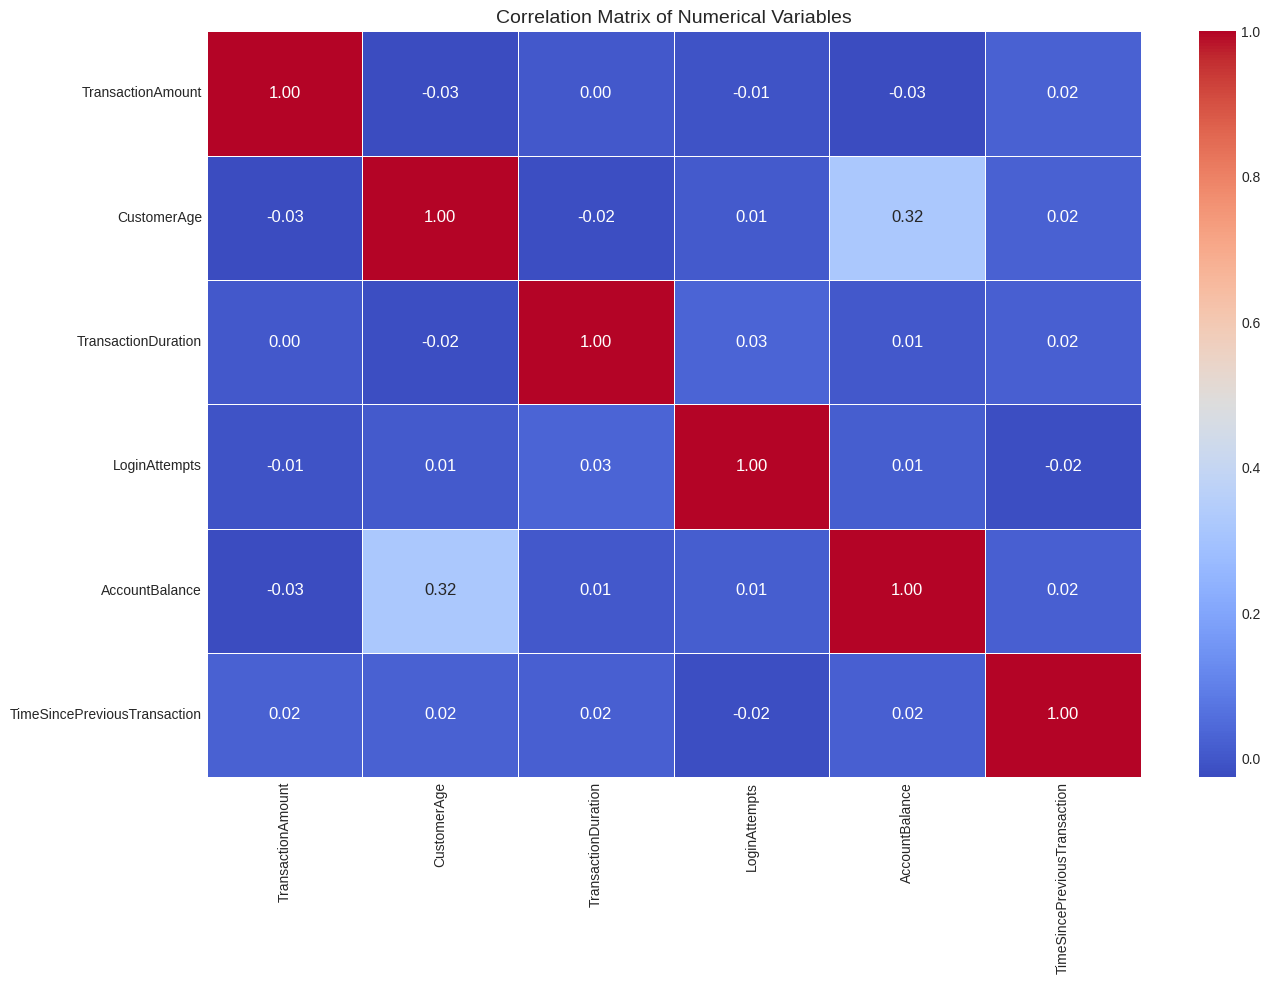

In [356]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

🔹 **Saldo Rekening & Usia Nasabah** 📊  
Terdapat korelasi **moderate positif (0.32)** antara **CustomerAge** dan **AccountBalance**, yang menunjukkan bahwa nasabah lebih tua cenderung memiliki saldo lebih besar.  

🔹 **Jumlah Transaksi & Saldo Rekening** 💰  
Korelasi **lemah positif (0.18)** menunjukkan bahwa saldo yang lebih besar sedikit berhubungan dengan nilai transaksi yang lebih tinggi, tetapi tidak signifikan.  

🔹 **Durasi Transaksi & Jumlah Transaksi** ⏳  
Hubungan sangat lemah, menandakan bahwa transaksi besar tidak selalu memakan waktu lebih lama.  

🔹 **Upaya Login & Faktor Lain** 🔐  
Tidak ada korelasi signifikan dengan variabel lain, menunjukkan bahwa **kesulitan login lebih dipengaruhi faktor eksternal** seperti lupa password atau potensi aktivitas mencurigakan.  

📌 **Kesimpulan**: Tidak ada korelasi yang sangat kuat, tetapi pola ini dapat membantu dalam eksplorasi lebih lanjut untuk analisis risiko atau segmentasi pelanggan! 🚀

### **⚒ Pola Transaksi Berdasarkan Dimensi Berbeda**  

Mari kita lihat bagaimana **jumlah transaksi** dipengaruhi oleh berbagai kategori:  

🔹 **Berdasarkan jenis transaksi** → Apakah ada perbedaan signifikan dalam jumlah transaksi antara tipe transaksi tertentu?  
🔹 **Berdasarkan channel** → Platform mana yang memiliki transaksi terbesar?  
🔹 **Berdasarkan pekerjaan pelanggan** → Apakah profesi tertentu memiliki jumlah transaksi lebih besar?  
🔹 **Berdasarkan waktu** → Bagaimana distribusi transaksi per bulan? Apakah ada pola musiman?  

📌 **Visualisasi:**  
📦 **Boxplot** untuk membandingkan jumlah transaksi di berbagai kategori.  
📊 **Histogram & bar chart** untuk melihat distribusi transaksi dalam waktu tertentu.  

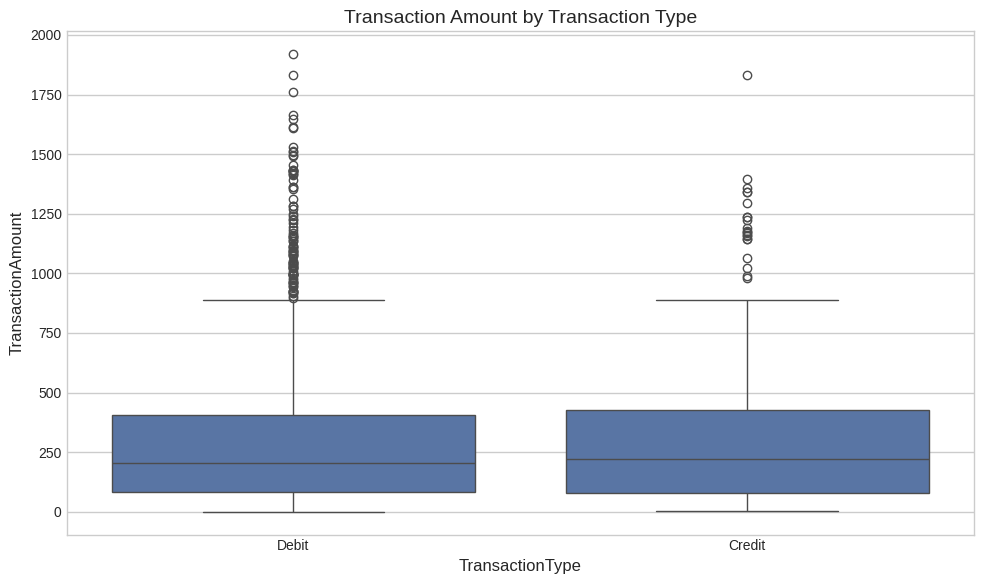

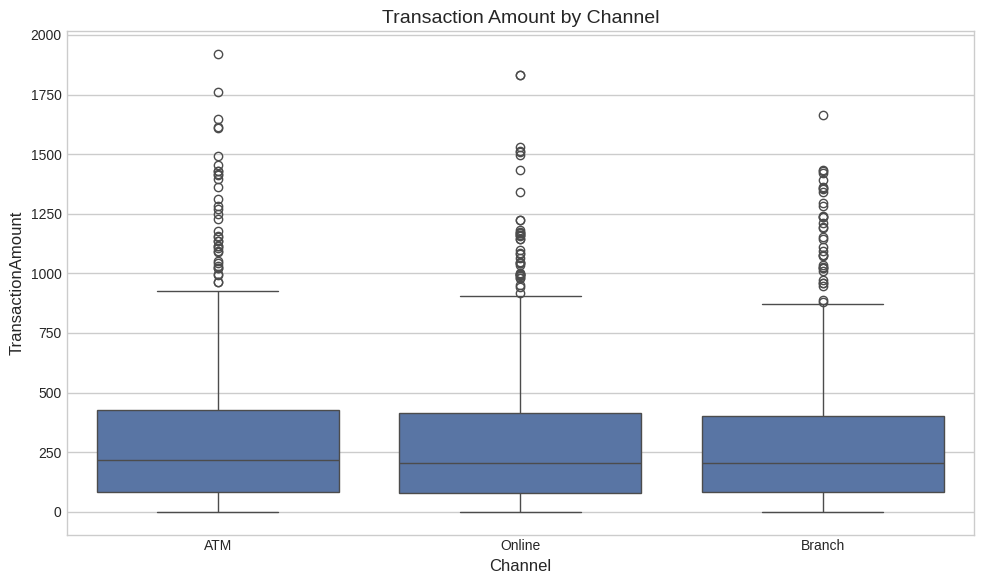

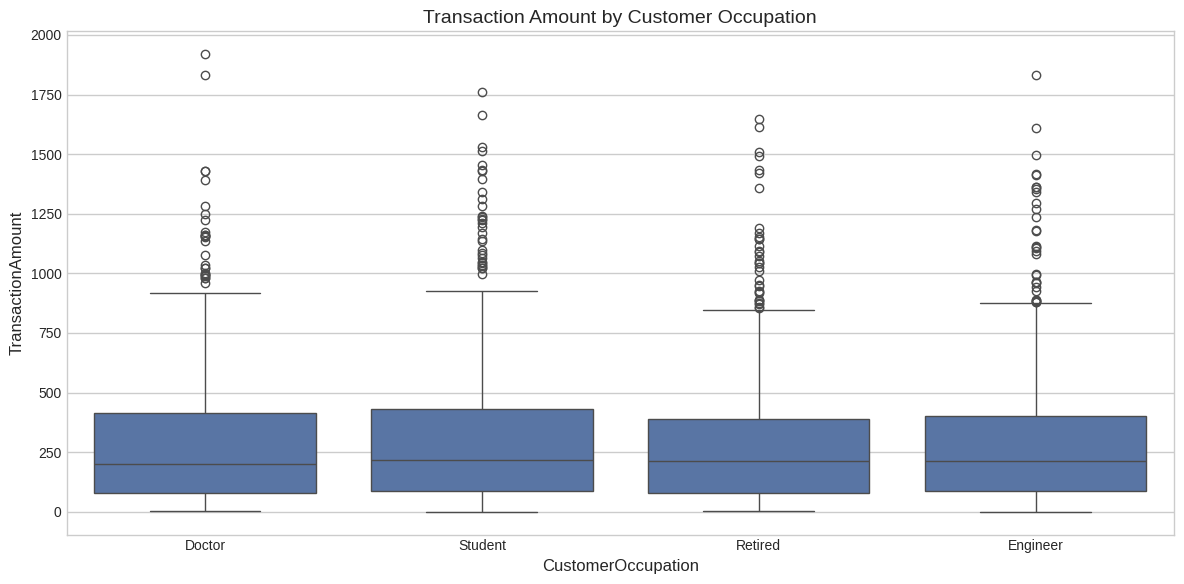

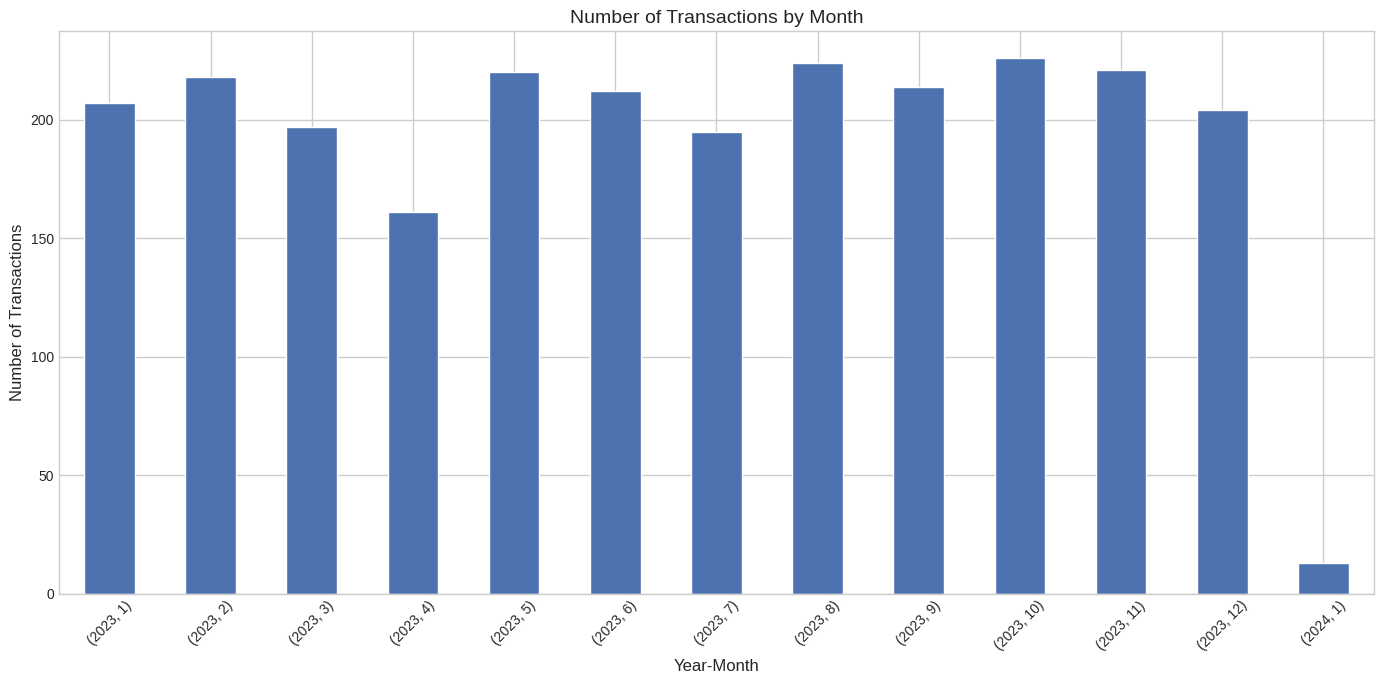

In [357]:
# Transaction amount by transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Transaction Type')
plt.tight_layout()
plt.show()

# Transaction amount by channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Channel')
plt.tight_layout()
plt.show()

# Transaction amount by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='TransactionAmount', data=df)
plt.title('Transaction Amount by Customer Occupation')
plt.tight_layout()
plt.show()

# Transaction distribution over time
plt.figure(figsize=(14, 7))
transaction_by_month = df.groupby(['TransactionYear', 'TransactionMonth']).size()
transaction_by_month.plot(kind='bar')
plt.title('Number of Transactions by Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

🚀 **Debit vs Credit: Siapa yang Lebih Dominan?**  
Transaksi **Debit** memang **lebih sering terjadi** (1.944 kali dibanding 568 untuk Credit), tapi jangan terkecoh! Meskipun jumlahnya jauh lebih besar, **median nilai transaksi kedua jenis ini hampir sama** (sekitar Rp 200). Fakta menarik? **Debit punya lebih banyak transaksi bernilai fantastis** (outlier hingga Rp 1.900!), menandakan ada segmen nasabah yang lebih nyaman menarik dana dalam jumlah besar dibanding menyetor. Apakah ini strategi keuangan atau hanya kebiasaan? 🔍  

🏧 **ATM vs Online vs Branch: Pilihan Transaksi yang Mengejutkan!**  
Siapa sangka, **ATM jadi tempat paling favorit untuk transaksi besar**! Dengan outlier mencapai **Rp 1.900**, nasabah lebih sering melakukan transaksi dalam jumlah besar di mesin ATM dibanding Online atau Branch. Mengapa? Bisa jadi karena kenyamanan atau kebijakan limit transaksi di channel lain. Apakah ini sinyal untuk meningkatkan keamanan transaksi ATM? 🚨💳  

👨‍⚕️👨‍🎓 **Profesimu Menentukan Caramu Bertransaksi?**  
- **Mahasiswa (Student) ternyata tidak kalah boros dari dokter!** Siapa sangka, mereka juga punya transaksi bernilai tinggi, sama seperti **Doctor**.  
- **Pensiunan (Retired) bermain aman** dengan transaksi yang lebih stabil dan terprediksi—mungkin karena pengelolaan keuangan yang lebih hati-hati.  
- **Engineer lebih konservatif** dibanding profesi lain, dengan distribusi transaksi yang lebih merata.  

Apa ini menunjukkan pola keuangan berdasarkan gaya hidup dan tanggung jawab finansial? 🔬📉  

📅 **Siklus Transaksi: Naik-Turun Seperti Roller Coaster! 🎢**  
- **Oktober 2023 jadi bulan dengan transaksi tertinggi**, bisa jadi karena bonus akhir tahun mulai cair atau persiapan belanja besar-besaran.  
- **April 2023 mengalami penurunan tajam**, mungkin karena habisnya dana pasca liburan atau strategi keuangan untuk kuartal berikutnya.  
- **Tahun 2024 diawali dengan penurunan drastis**, apakah ini tanda perubahan tren transaksi atau hanya karena data yang belum lengkap?  

🔥 **Insight-nya?**  
- **ATM jadi pilihan utama untuk transaksi besar**  
- **Mahasiswa punya transaksi besar yang mengejutkan**  
- **Debit lebih sering terjadi, tapi nilai transaksinya tetap bersaing dengan Credit**  
- **Fluktuasi musiman membuka peluang prediksi tren transaksi selanjutnya**  

### 👥 **Analisis Distribusi Usia Pelanggan**  

Bagaimana usia pelanggan berkaitan dengan perilaku transaksi?  
🔹 Apakah pelanggan yang lebih muda cenderung bertransaksi lebih besar?  
🔹 Apakah ada perbedaan berdasarkan profesi?  

📌 **Visualisasi:**  
📦 **Boxplot** untuk melihat distribusi usia berdasarkan pekerjaan.  
📈 **Scatterplot** untuk melihat hubungan antara usia dan jumlah transaksi.  

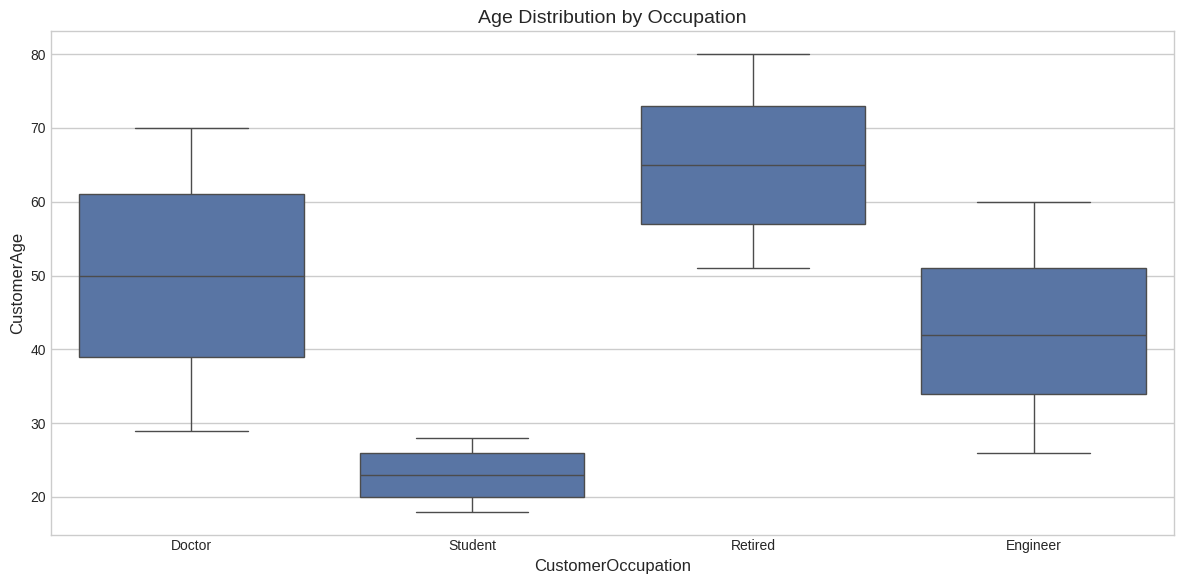

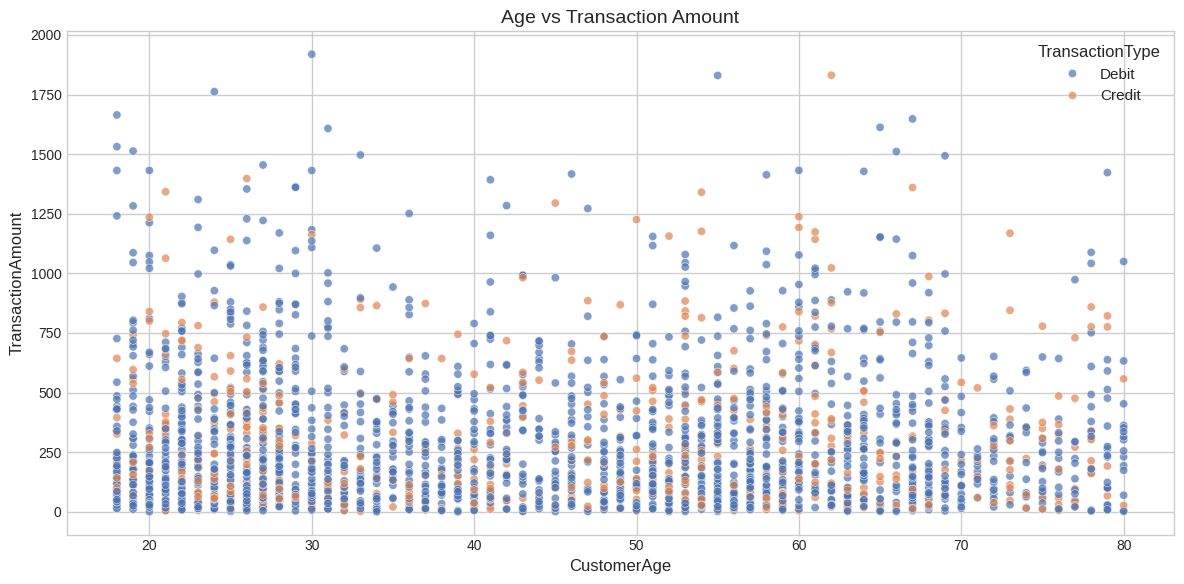

In [358]:
# Age distribution by occupation
plt.figure(figsize=(12, 6))
sns.boxplot(x='CustomerOccupation', y='CustomerAge', data=df)
plt.title('Age Distribution by Occupation')
plt.tight_layout()
plt.show()

# Scatterplot of Age vs Transaction Amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CustomerAge', y='TransactionAmount', hue='TransactionType', data=df, alpha=0.7)
plt.title('Age vs Transaction Amount')
plt.tight_layout()
plt.show()

 🎯 **Usia Muda vs. Tua: Siapa yang Lebih Royal?**  
Scatterplot menunjukkan bahwa **tidak ada hubungan kuat** antara usia dan nilai transaksi. Bahkan, transaksi jumbo (>Rp1.000) **tersebar merata dari usia 20-an hingga 80-an**. Ini artinya, gaya transaksi bukan soal umur, melainkan mungkin soal kebiasaan atau gaya hidup atau gengsi wkwkwkwk.  

🚀 **Fakta menarik:**  
- 📌 **Nasabah usia 30-an punya variasi transaksi tertinggi**, dengan beberapa mencapai hampir **Rp 2.000!** 🤯  
- 📌 **Nasabah 40-50-an yang biasanya dianggap “stabil” ternyata tidak mendominasi transaksi besar**.   
- 📌 **Debit tetap jadi raja di semua usia**, sementara Credit punya pola serupa tapi dengan frekuensi lebih kecil.  

🔎 **Apa artinya?**  
> Usia saja **tidak bisa dijadikan prediktor kuat** untuk menebak kebiasaan transaksi nasabah. Bank perlu menggali faktor lain seperti pendapatan atau gaya hidup untuk memahami pola transaksi lebih dalam. Namun, ini dapat membantu dalam segmentasi pelanggan!  

🏢 **Pekerjaan vs. Usia: Apakah Stereotip Itu Benar?**  

Boxplot data menunjukkan sesuatu yang **mengesankan!** Distribusi usia per pekerjaan **sangat masuk akal**, bahkan cocok dengan pola karir di dunia nyata.  

👨‍🎓 **Student (18-28 tahun)**  
-  Median **22 tahun** – cocok dengan usia mahasiswa!  
-  **Tapi tunggu...** ada beberapa yang berusia **di atas 25**. Apakah mereka mahasiswa pascasarjana atau pekerja yang kuliah lagi? 🤔  

👷 **Engineer (26-60 tahun)**  
-  Median **42 tahun** – pas dengan perjalanan karir teknis yang panjang.  
-  Engineer ternyata punya **rentang usia lebih luas**, menandakan bahwa profesi ini bisa bertahan dalam jangka waktu panjang.  

🩺 **Doctor (29-70 tahun)**  
-  Median **50 tahun** – sesuai dengan lama pendidikan dan pengalaman yang dibutuhkan.  
-  **Rentangnya sangat luas!** Dari dokter muda sampai senior, mereka tetap aktif dalam profesinya.  

👴 **Retired (51-80 tahun)**  
-  **Tidak mengejutkan**, median di **65 tahun**, sesuai dengan usia pensiun standar.  
-  Pola transaksi mereka lebih stabil dan **cenderung lebih kecil**, menunjukkan pendekatan finansial yang lebih hati-hati.  

### 🔑 **Analisis Upaya Login & Keamanan**  

Beberapa pelanggan mungkin mencoba login berkali-kali sebelum transaksi, yang bisa menjadi indikasi **potensi fraud** atau **masalah akses akun**.  
✅ Distribusi jumlah upaya login  
✅ Siapa yang paling sering gagal login?  

📌 **Visualisasi:**  
📊 **Countplot** untuk melihat jumlah upaya login.  
📊 **Countplot berdasarkan profesi pelanggan** untuk melihat tren login yang mencurigakan.  

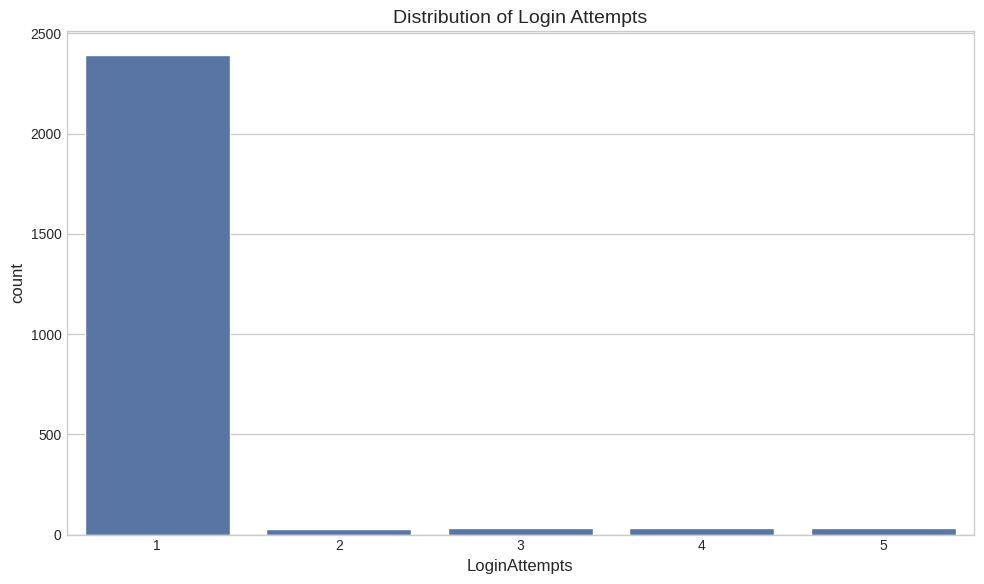

Transactions with more than 1 login attempt: 122


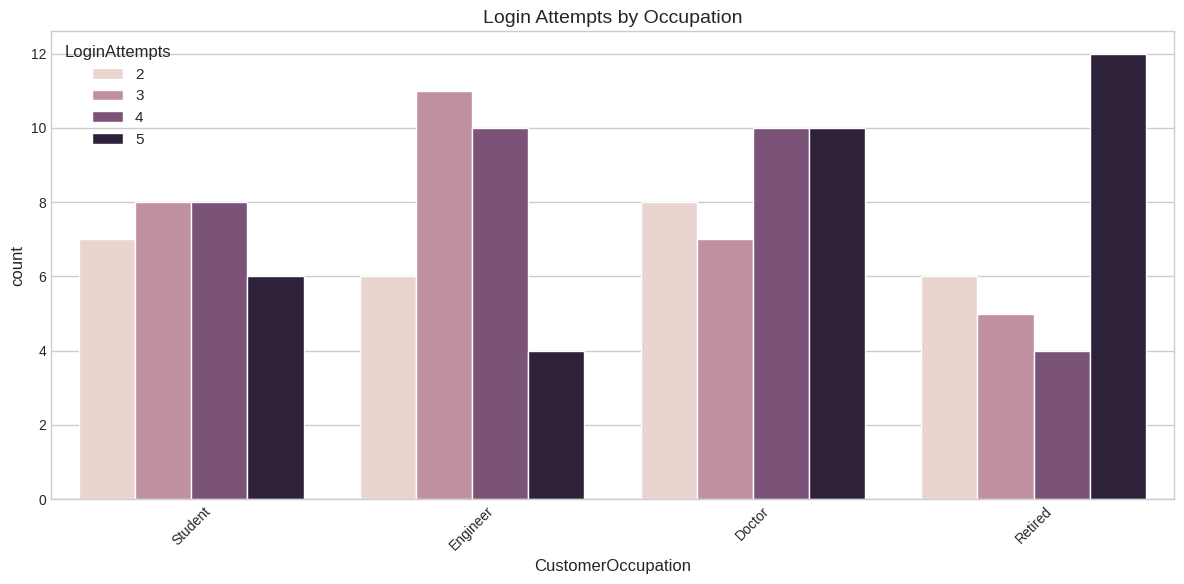

In [359]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LoginAttempts', data=df)
plt.title('Distribution of Login Attempts')
plt.tight_layout()
plt.show()

# For values greater than 1, analyze further
high_login_attempts = df[df['LoginAttempts'] > 1]
if len(high_login_attempts) > 0:
    print(f"Transactions with more than 1 login attempt: {len(high_login_attempts)}")
    
    plt.figure(figsize=(12, 6))
    sns.countplot(x='CustomerOccupation', hue='LoginAttempts', data=high_login_attempts)
    plt.title('Login Attempts by Occupation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

📊 **Mayoritas Nasabah Lolos Sekali Coba!**  

>Data transaksi bank mengungkap fakta menarik: **lebih dari 90% nasabah berhasil login dalam 1 kali percobaan**! Ini menunjukkan bahwa **sistem autentikasi bank bekerja dengan baik** untuk sebagian besar pengguna.  

💡 **Bagaimana dengan yang gagal login berkali-kali?**  

Sebagian kecil transaksi (kurang dari 10%) menunjukkan **upaya login berulang (2-5 kali)**—dan ini bisa jadi sinyal bahaya! 🚨  

🚀 **Kenapa harus diperhatikan?**  
🔸 **Upaya login 4-5 kali bisa jadi tanda peretasan atau akun terkunci.**  
🔸 **Beberapa pengguna mungkin mengalami kesulitan karena faktor teknis atau lupa password.**  
🔸 **Kelompok tertentu, seperti pensiunan, lebih sering mengalami masalah login!**  


🏢 **Siapa yang Paling Sering Lupa Login?**  

Ketika kita melihat data login berdasarkan pekerjaan, beberapa pola menarik muncul!  

👴 **Pensiunan (Retired) – Raja Lupa Password!**  
- **12 kasus gagal login 5 kali!** Ini jauh lebih tinggi dibanding kelompok lain.  
-  Mungkin disebabkan oleh **kendala teknis, memori, atau kurang familiar dengan sistem digital**.    

⚙️ **Engineer – Si Ahli Teknologi yang Gigih!**  
-  **Paling sering gagal login 3 kali (11 kasus)**, tapi hampir tidak pernah mencapai 5 kali.  
- Engineer mungkin **lebih teliti dan mencoba berbagai solusi sebelum benar-benar gagal**.  
- Ini menunjukkan bahwa mereka **lebih sadar teknologi** dan tidak mudah menyerah.  

🩺 **Dokter – Jadwal Sibuk, Login Berantakan!**  
- **Gagal login tersebar merata di semua kategori!**  
- Dengan jadwal kerja yang padat, **dokter mungkin sering lupa kredensial mereka**.  

🎓 **Mahasiswa – Stabil, Tapi Tetap Bermasalah**  
- **Upaya login tersebar secara konsisten (6-8 kasus di setiap kategori)**.  
- Mereka tidak punya pola ekstrem, tapi tetap **terdampak oleh masalah login**.  
- Bisa jadi akibat **perangkat yang sering berganti atau keamanan ekstra dari sistem kampus/universitas**.  

### ⏳ **Analisis Waktu Antar Transaksi**  

Bagaimana waktu antar transaksi mencerminkan perilaku pelanggan?  
✅ Seberapa sering pelanggan bertransaksi?  
✅ Apakah ada transaksi yang terjadi dalam rentang waktu sangat pendek yang mencurigakan?  

📌 **Visualisasi:**  
📈 **Histogram** untuk melihat distribusi waktu antar transaksi.  
📦 **Boxplot** untuk membandingkan waktu antar transaksi berdasarkan jenis transaksi.  

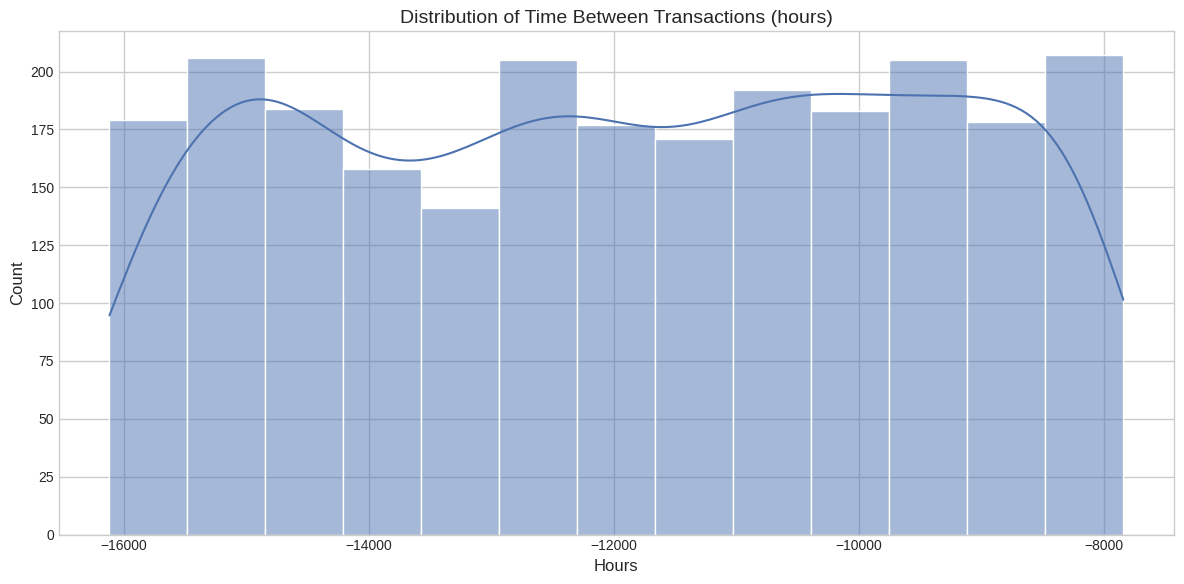

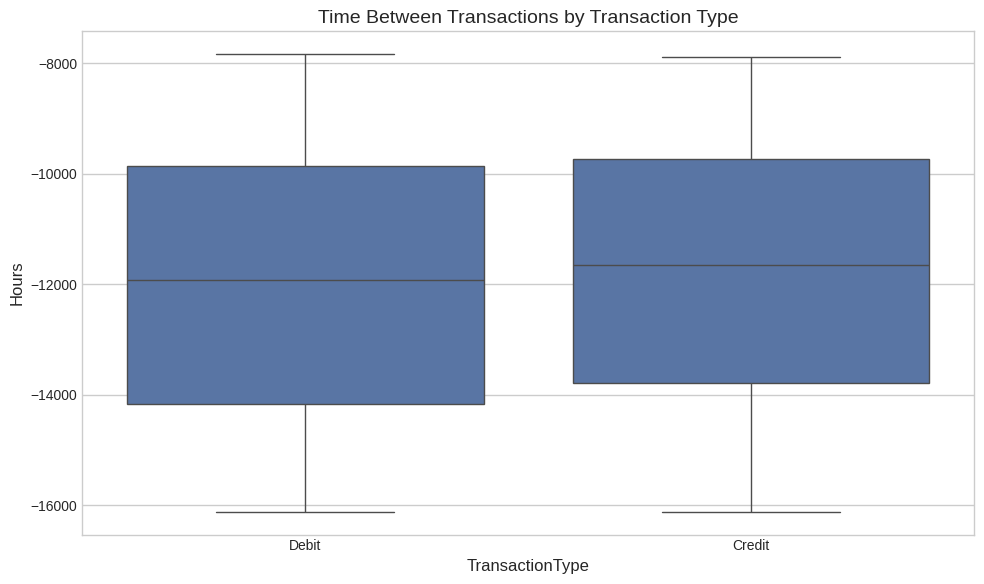

In [360]:
# Create a histogram of time between transactions
plt.figure(figsize=(12, 6))
# Filter out extreme values for better visualization
filtered_time = df[df['TimeSincePreviousTransaction'] < df['TimeSincePreviousTransaction'].quantile(0.95)]
sns.histplot(filtered_time['TimeSincePreviousTransaction'], kde=True)
plt.title('Distribution of Time Between Transactions (hours)')
plt.xlabel('Hours')
plt.tight_layout()
plt.show()

# Time between transactions by transaction type
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='TimeSincePreviousTransaction', data=filtered_time)
plt.title('Time Between Transactions by Transaction Type')
plt.ylabel('Hours')
plt.tight_layout()
plt.show()

📊 **Rentang waktu transaksi tersebar luas** antara **-16.000 hingga -8.000 jam** (ya, nilai negatif!). Ini mungkin karena pengukuran dilakukan relatif terhadap titik waktu di masa depan.  

🔍 **Apa artinya?**  
- **Tidak ada pola transaksi harian, mingguan, atau bulanan yang dominan.**  
- **Beberapa puncak kecil muncul**, menunjukkan bahwa ada interval waktu tertentu yang lebih umum digunakan.  
- **Nasabah bertransaksi dengan cara yang unik dan tidak selalu terstruktur.**  

💡 **Intinya?** Tidak semua nasabah punya jadwal tetap dalam bertransaksi, yang mencerminkan kebutuhan finansial yang sangat beragam.  



💳 **Mana yang Lebih Sering? Debit atau Kredit?**  

📌 Saat kita membandingkan **interval waktu transaksi Debit vs. Credit**, beberapa pola menarik muncul dari boxplot:  

⚖️ **1️⃣ Debit – Si Pengeluaran Fleksibel**  
- **Median waktu antar transaksi: sekitar -12.000 jam**.  
- **Rentang waktu antar transaksi lebih luas** (kotaknya lebih besar!), menunjukkan bahwa **nasabah menarik uang dengan jadwal yang lebih tidak terduga**.  
- Bisa jadi ini mencerminkan **pola belanja atau pengeluaran yang berubah-ubah**.  

💰 **2️⃣ Credit – Si Setoran Terjadwal**  
- **Median waktu antar transaksi: sekitar -11.500 jam**.  
- **Distribusinya lebih rapat**, menunjukkan bahwa nasabah **menyetor uang dengan interval yang lebih stabil**.  
- Pola ini bisa mencerminkan **penerimaan gaji bulanan atau kebiasaan menabung yang lebih konsisten**.  

⚡ **3️⃣ Kemiripan Menarik: Debit & Credit!**  
- **Whisker** (garis vertikal pada boxplot) hampir identik di kedua jenis transaksi, menunjukkan bahwa **nasabah melakukan Debit dan Credit dalam rentang waktu yang relatif sama**.  
- **Tidak ada lonjakan transaksi mencurigakan** yang bisa menjadi indikator aktivitas keuangan yang berisiko.  

🚀 **Apa yang Bisa Kita Pelajari?**  

🔹 **Transaksi Kredit lebih teratur**, bisa jadi karena faktor gaji dan tabungan rutin.  
🔹 **Transaksi Debit lebih acak**, sesuai dengan pola belanja dan kebutuhan individu.  
🔹 **Tidak ada pola transaksi mencurigakan**, menunjukkan sistem perbankan yang relatif aman.  

### **🎭 Pairplot: Melihat Pola Secara Keseluruhan!**  

Akhirnya, kita gabungkan semua variabel kunci dalam **pairplot**, untuk melihat hubungan antar variabel secara langsung!  
📌 **Visualisasi:**  
📌 Scatterplot untuk melihat pola distribusi antar variabel utama.  
📌 Warna berdasarkan jenis transaksi untuk melihat perbedaan antar kategori.  

<Figure size 1500x1500 with 0 Axes>

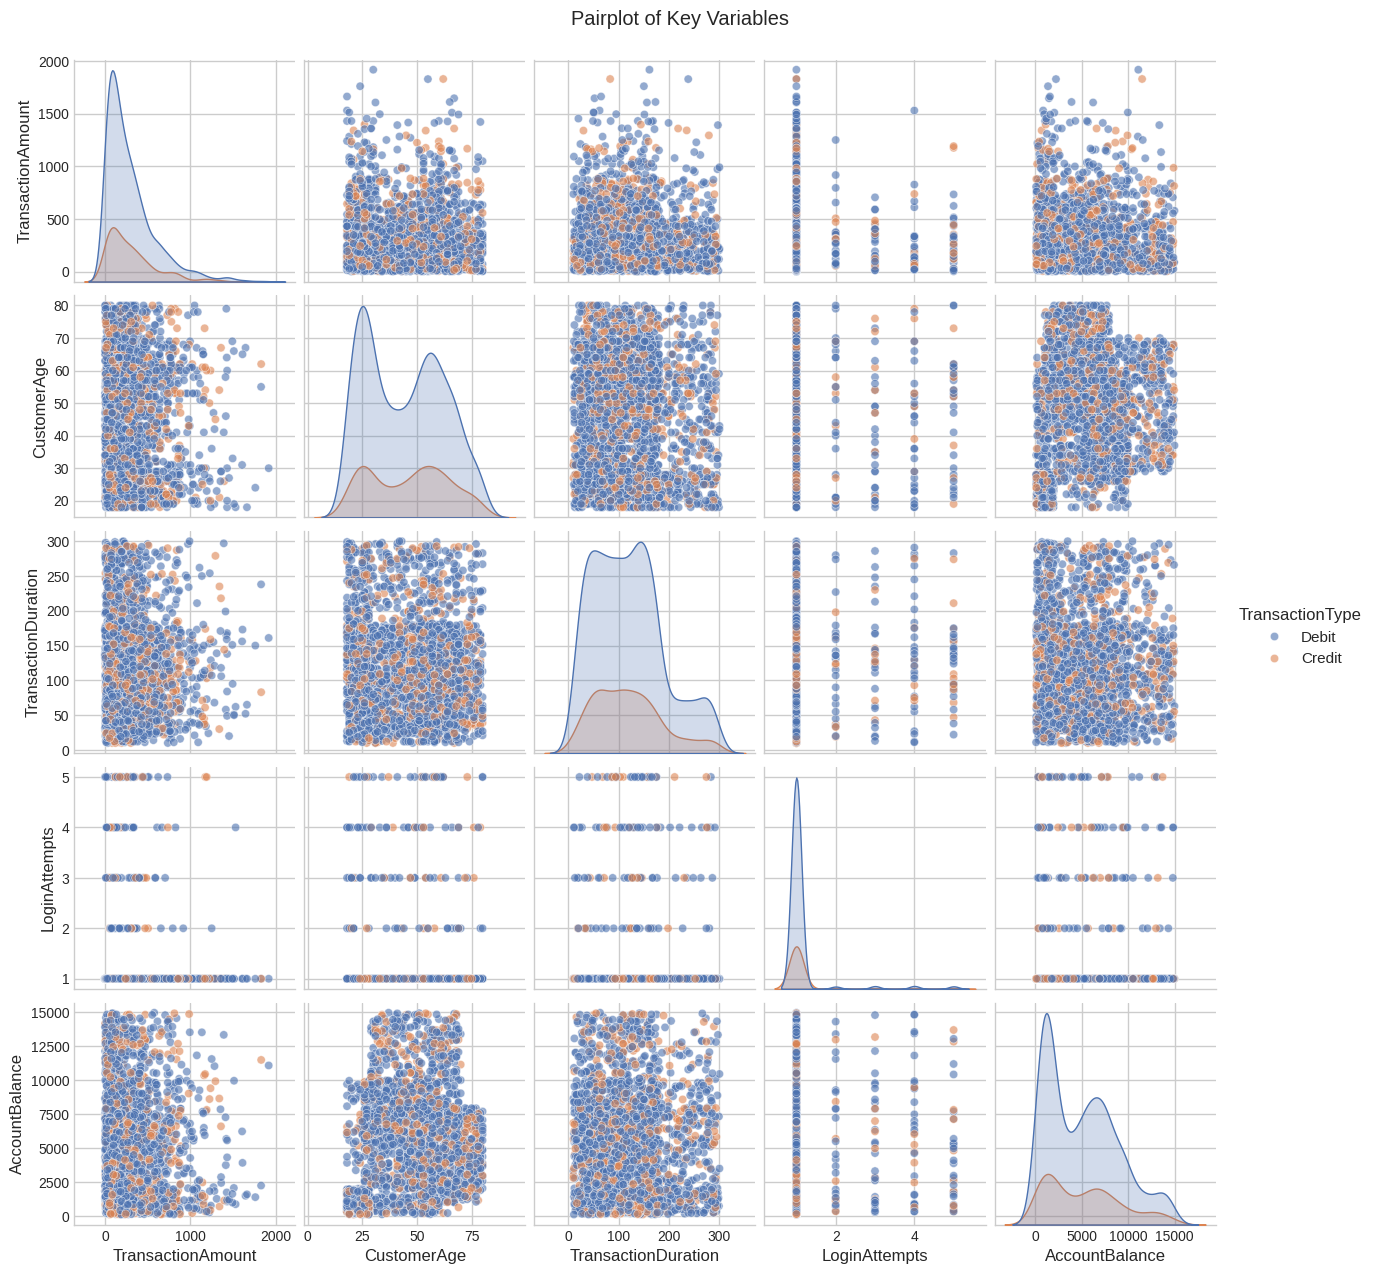

In [361]:
key_vars = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(15, 15))
sns.pairplot(df[key_vars + ['TransactionType']], hue='TransactionType', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Key Variables', y=1.02)
plt.show()

In [362]:
df.to_csv('data/bank_transactions_data_3.csv', index=False)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

Original dataset shape: (2512, 22)

Features after advanced engineering:
['TransactionAmount', 'TransactionType', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TimeSincePreviousTransaction', 'TransactionYear', 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'TransactionDayOfWeek', 'Channel_Branch', 'Channel_Online', 'Occupation_Engineer', 'Occupation_Retired', 'Occupation_Student', 'Location_Freq', 'Daily_Transaction_Count', 'Amount_Percentile', 'Amount_Ratio_To_Avg', 'Login_Ratio_To_Avg', 'Is_Weekend', 'Is_Business_Hours', 'Is_Late_Night', 'Potential_Fraud_Score']
New shape: (2512, 26)
Isolation Forest identified 126 outliers (5.02%)

Top 15 most important features:


,Feature,Importance
19,Amount_Percentile,0.37
0,TransactionAmount,0.31
20,Amount_Ratio_To_Avg,0.29
25,Potential_Fraud_Score,0.01
5,AccountBalance,0.00
6,TimeSincePreviousTransaction,0.00
2,CustomerAge,0.00
3,TransactionDuration,0.00
18,Daily_Transaction_Count,0.00
4,LoginAttempts,0.00


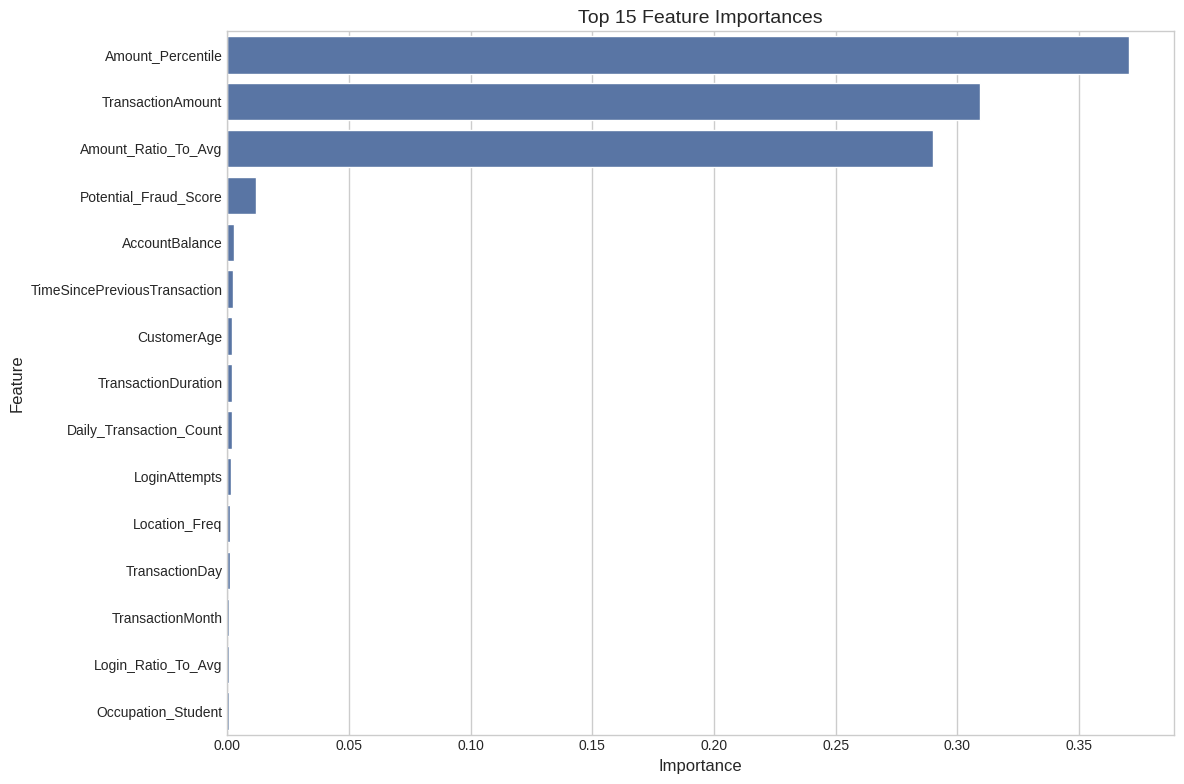


Selected 7 features including domain-specific features
['Amount_Percentile', 'TransactionAmount', 'Amount_Ratio_To_Avg', 'Potential_Fraud_Score', 'Is_Late_Night', 'LoginAttempts', 'Is_Weekend']

Final dataset shape: (2512, 8)


In [363]:
# Advanced Feature Selection & Engineering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load preprocessed data
df = pd.read_csv('data/bank_transactions_data_3.csv')
print("Original dataset shape:", df.shape)

# Remove identifier columns
id_columns = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']
date_columns = ['TransactionDate', 'PreviousTransactionDate']
df_clean = df.drop(columns=id_columns + date_columns)

# Handle categorical variables - use more advanced encoding
# For TransactionType - binary encoding
df_clean['TransactionType'] = df_clean['TransactionType'].map({'Credit': 1, 'Debit': 0})

# For Channel - one-hot encoding
channel_dummies = pd.get_dummies(df_clean['Channel'], prefix='Channel', drop_first=True)
df_clean = pd.concat([df_clean.drop(columns=['Channel']), channel_dummies], axis=1)

# For CustomerOccupation - one-hot encoding
occupation_dummies = pd.get_dummies(df_clean['CustomerOccupation'], prefix='Occupation', drop_first=True)
df_clean = pd.concat([df_clean.drop(columns=['CustomerOccupation']), occupation_dummies], axis=1)

# For Location - we'll use frequency encoding instead of label encoding
location_freq = df_clean['Location'].value_counts(normalize=True).to_dict()
df_clean['Location_Freq'] = df_clean['Location'].map(location_freq)
df_clean = df_clean.drop(columns=['Location'])

# More domain-specific features
# 1. Transaction velocity (number of transactions per day)
df_clean['Day_Key'] = df_clean['TransactionYear']*10000 + df_clean['TransactionMonth']*100 + df_clean['TransactionDay']
day_counts = df_clean.groupby('Day_Key').size().to_dict()
df_clean['Daily_Transaction_Count'] = df_clean['Day_Key'].map(day_counts)
df_clean = df_clean.drop(columns=['Day_Key'])

# 2. Transaction amount percentile (relative to all transactions)
df_clean['Amount_Percentile'] = df_clean['TransactionAmount'].rank(pct=True)

# 3. Transaction amount ratio to average transaction
avg_transaction = df_clean['TransactionAmount'].mean()
df_clean['Amount_Ratio_To_Avg'] = df_clean['TransactionAmount'] / avg_transaction

# 4. Login attempt ratio (compared to average)
df_clean['Login_Ratio_To_Avg'] = df_clean['LoginAttempts'] / df_clean['LoginAttempts'].mean()

# 5. Time pattern features
df_clean['Is_Weekend'] = (df_clean['TransactionDayOfWeek'] >= 5).astype(int)
df_clean['Is_Business_Hours'] = ((df_clean['TransactionHour'] >= 9) & 
                               (df_clean['TransactionHour'] <= 17)).astype(int)
df_clean['Is_Late_Night'] = ((df_clean['TransactionHour'] >= 22) | 
                           (df_clean['TransactionHour'] <= 5)).astype(int)

# 6. Synthetic Fraud Indicators
df_clean['Potential_Fraud_Score'] = (
    # High login attempts
    (df_clean['LoginAttempts'] > 1).astype(int) * 0.3 +
    # Unusual transaction time
    df_clean['Is_Late_Night'] * 0.2 +
    # High transaction amount
    (df_clean['TransactionAmount'] > df_clean['TransactionAmount'].quantile(0.95)).astype(int) * 0.3 +
    # Short time since previous transaction
    (df_clean['TimeSincePreviousTransaction'].abs() < 
     df_clean['TimeSincePreviousTransaction'].abs().quantile(0.1)).astype(int) * 0.2
)

# Display the new features
print("\nFeatures after advanced engineering:")
print(df_clean.columns.tolist())
print(f"New shape: {df_clean.shape}")

# Handle outliers more aggressively
def handle_outliers_with_isolation_forest(df, contamination=0.05):
    """Use Isolation Forest to detect and handle outliers"""
    from sklearn.ensemble import IsolationForest
    
    # Select numerical columns
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    # Fit Isolation Forest
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    outlier_labels = iso_forest.fit_predict(df[num_cols])
    
    # Convert to binary indicator (1: normal, -1: outlier)
    outlier_indicators = pd.Series(outlier_labels, index=df.index)
    outlier_count = (outlier_indicators == -1).sum()
    
    print(f"Isolation Forest identified {outlier_count} outliers ({outlier_count/len(df)*100:.2f}%)")
    
    # Create weight column (outliers get lower weight)
    df['sample_weight'] = 1.0
    df.loc[outlier_indicators == -1, 'sample_weight'] = 0.2
    
    return df

# Apply Isolation Forest for outlier detection
df_clean = handle_outliers_with_isolation_forest(df_clean)

# Scale the data using RobustScaler which is less influenced by outliers
scaler = RobustScaler()
num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('sample_weight')  # Don't scale the weights
df_clean[num_cols] = scaler.fit_transform(df_clean[num_cols])

# Use Random Forest to identify most important features
# We'll create a synthetic target by using K-means with 2 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
synthetic_labels = kmeans.fit_predict(df_clean.drop(columns=['sample_weight']))

# Assess feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(df_clean.drop(columns=['sample_weight']), synthetic_labels, 
       sample_weight=df_clean['sample_weight'])

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': df_clean.drop(columns=['sample_weight']).columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Display top 15 features
print("\nTop 15 most important features:")
display(feature_importances.head(15))

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# Pilih top features berdasarkan importance
base_top_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()

# Pastikan fitur penting untuk domain tetap ada
domain_important_features = ['Is_Late_Night', 'LoginAttempts', 'Is_Weekend']
missing_important = [f for f in domain_important_features if f not in base_top_features]

# Gabungkan kedua jenis fitur
top_features = base_top_features + missing_important
print(f"\nSelected {len(top_features)} features including domain-specific features")
print(top_features)

# Create final dataset with top features and sample weights
df_final = df_clean[top_features + ['sample_weight']]
print(f"\nFinal dataset shape: {df_final.shape}")

# Save the final dataset
df_final.to_csv('advanced_preprocessed_data.csv', index=False)

Dataset shape for clustering: (2512, 7)


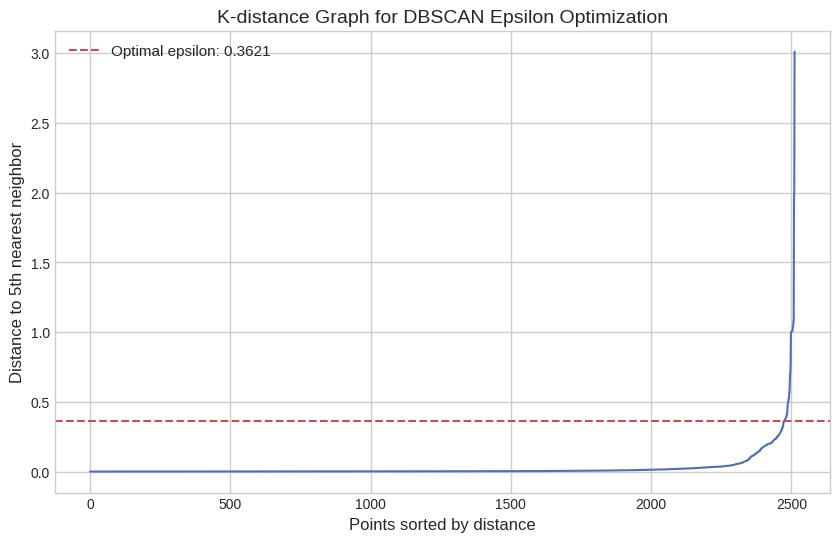

Optimal epsilon for DBSCAN: 0.3621
DBSCAN found 8 clusters with 30 noise points (1.19% of data)
DBSCAN Silhouette Score (excluding noise): 0.1447

HDBSCAN found 9 clusters with 42 noise points (1.67% of data)
HDBSCAN Silhouette Score (excluding noise): -0.1270

Best Agglomerative Clustering: {'linkage': 'average', 'n_clusters': 2}
Silhouette Score: 0.7103
Weighted K-Means with 2 clusters: Silhouette Score = 0.5591
Weighted K-Means with 3 clusters: Silhouette Score = 0.5058
Weighted K-Means with 4 clusters: Silhouette Score = 0.4690
Weighted K-Means with 5 clusters: Silhouette Score = 0.5300
Weighted K-Means with 6 clusters: Silhouette Score = 0.5312
Weighted K-Means with 7 clusters: Silhouette Score = 0.5150
Weighted K-Means with 8 clusters: Silhouette Score = 0.5002
Weighted K-Means with 9 clusters: Silhouette Score = 0.5019
Weighted K-Means with 10 clusters: Silhouette Score = 0.4956

Best Weighted K-Means: 2 clusters
Silhouette Score: 0.5591
Spectral Clustering with 2 clusters: Silh

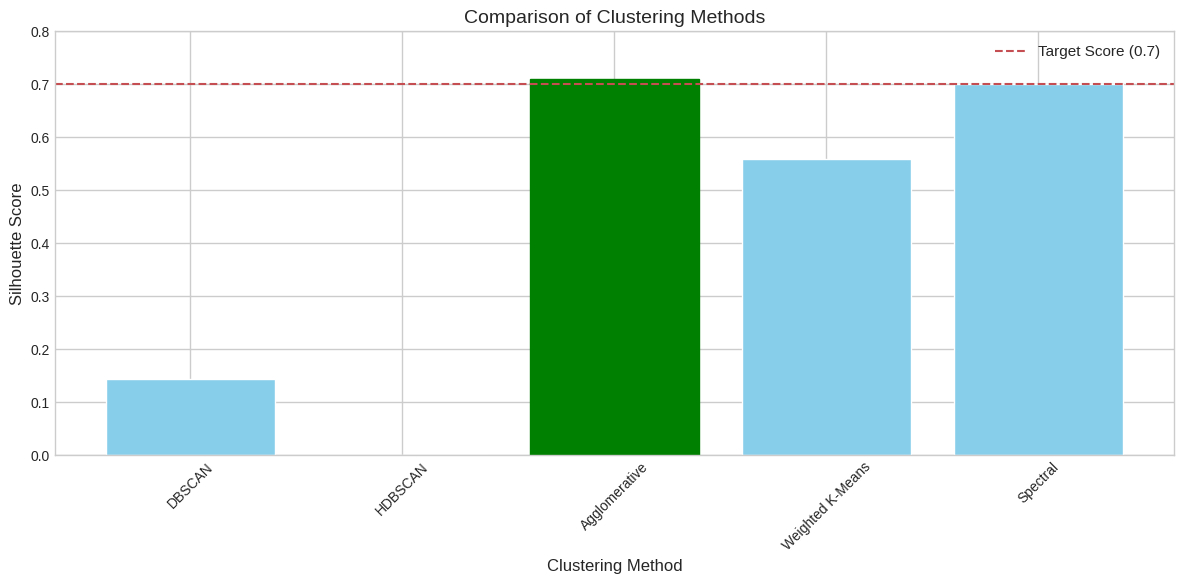

In [364]:
# Advanced Clustering Techniques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import hdbscan
import warnings
warnings.filterwarnings('ignore')

# Load the advanced preprocessed data
df = pd.read_csv('advanced_preprocessed_data.csv')

# Extract features and weights
features = df.drop(columns=['sample_weight']).values if 'sample_weight' in df.columns else df.values
# Extract weights if they exist
weights = df['sample_weight'].values if 'sample_weight' in df.columns else np.ones(len(features))

print(f"Dataset shape for clustering: {features.shape}")

# 1. DBSCAN with epsilon optimization
def optimize_dbscan_epsilon(X, min_samples=5, n_neighbors=5):
    """Find optimal epsilon parameter for DBSCAN using k-distance graph"""
    # Calculate distances to nearest neighbors
    neighbors = NearestNeighbors(n_neighbors=n_neighbors)
    neighbors_fit = neighbors.fit(X)
    distances, _ = neighbors_fit.kneighbors(X)
    
    # Sort distances to nth neighbor
    distances = np.sort(distances[:, n_neighbors-1])
    
    # Plot k-distance graph
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(distances)), distances)
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {n_neighbors}th nearest neighbor')
    plt.title('K-distance Graph for DBSCAN Epsilon Optimization')
    
    # Find the elbow point
    try:
        knee = KneeLocator(range(len(distances)), distances, 
                           curve='convex', direction='increasing')
        epsilon = distances[knee.knee]
        plt.axhline(y=epsilon, color='r', linestyle='--', 
                   label=f'Optimal epsilon: {epsilon:.4f}')
    except:
        # If elbow detection fails, use a percentile
        epsilon = np.percentile(distances, 95)
        plt.axhline(y=epsilon, color='r', linestyle='--', 
                   label=f'Fallback epsilon (95th pct): {epsilon:.4f}')
    
    plt.legend()
    plt.show()
    
    return epsilon

# Get optimal epsilon for DBSCAN
epsilon = optimize_dbscan_epsilon(features)
print(f"Optimal epsilon for DBSCAN: {epsilon:.4f}")

# Run DBSCAN with optimized epsilon
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(features)

# Count number of clusters (excluding noise points labeled as -1)
n_clusters_dbscan = len(set(dbscan_labels[dbscan_labels != -1]))
n_noise = list(dbscan_labels).count(-1)

print(f"DBSCAN found {n_clusters_dbscan} clusters with {n_noise} noise points " 
      f"({n_noise/len(dbscan_labels)*100:.2f}% of data)")

# Calculate silhouette score if more than one cluster and not all points are noise
if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    # Only consider non-noise points for silhouette score
    non_noise_mask = dbscan_labels != -1
    # FIXED: Removed sample_weight parameter
    dbscan_silhouette = silhouette_score(
        features[non_noise_mask], dbscan_labels[non_noise_mask]
    )
    print(f"DBSCAN Silhouette Score (excluding noise): {dbscan_silhouette:.4f}")
else:
    dbscan_silhouette = 0
    print("DBSCAN couldn't calculate silhouette score: insufficient clusters or too many noise points")

# 2. HDBSCAN (Hierarchical DBSCAN)
# More adaptive than standard DBSCAN and automatically selects epsilon
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5, 
                               cluster_selection_epsilon=0.1)
hdbscan_labels = hdbscan_model.fit_predict(features)

# Count number of clusters (excluding noise points labeled as -1)
n_clusters_hdbscan = len(set(hdbscan_labels[hdbscan_labels != -1]))
n_noise_hdbscan = list(hdbscan_labels).count(-1)

print(f"\nHDBSCAN found {n_clusters_hdbscan} clusters with {n_noise_hdbscan} noise points " 
      f"({n_noise_hdbscan/len(hdbscan_labels)*100:.2f}% of data)")

# Calculate silhouette score if more than one cluster and not all points are noise
if n_clusters_hdbscan > 1 and n_noise_hdbscan < len(hdbscan_labels):
    # Only consider non-noise points for silhouette score
    non_noise_mask = hdbscan_labels != -1
    # FIXED: Removed sample_weight parameter
    hdbscan_silhouette = silhouette_score(
        features[non_noise_mask], hdbscan_labels[non_noise_mask]
    )
    print(f"HDBSCAN Silhouette Score (excluding noise): {hdbscan_silhouette:.4f}")
else:
    hdbscan_silhouette = 0
    print("HDBSCAN couldn't calculate silhouette score: insufficient clusters or too many noise points")

# 3. Agglomerative Clustering with varying linkage methods
linkages = ['ward', 'complete', 'average']
n_clusters_range = [2, 3, 4, 5]
best_agglo_score = 0
best_agglo_params = {}

for linkage in linkages:
    for n_clusters in n_clusters_range:
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        labels = agglo.fit_predict(features)
        
        # FIXED: Removed sample_weight parameter
        score = silhouette_score(features, labels)
        
        if score > best_agglo_score:
            best_agglo_score = score
            best_agglo_params = {'linkage': linkage, 'n_clusters': n_clusters}

print(f"\nBest Agglomerative Clustering: {best_agglo_params}")
print(f"Silhouette Score: {best_agglo_score:.4f}")

# 4. Modified Weighted K-Means
# We'll still use weights for clustering but not for evaluation
class WeightedKMeans:
    def __init__(self, n_clusters=8, max_iter=300, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        
    def fit(self, X, sample_weight=None):
        # Initialize KMeans
        self.kmeans_ = KMeans(
            n_clusters=self.n_clusters, 
            max_iter=self.max_iter,
            random_state=self.random_state,
            n_init=10
        )
        
        # If weights are provided, we'll preprocess the data
        if sample_weight is not None:
            # Scale features based on weights
            # Multiply each sample by its square root weight
            # This is a common approach to incorporate weights
            scaled_X = X * np.sqrt(sample_weight)[:, np.newaxis]
            
            # Fit using the weighted samples
            self.kmeans_.fit(scaled_X)
        else:
            # Standard KMeans
            self.kmeans_.fit(X)
            
        # Store cluster centers and labels
        self.cluster_centers_ = self.kmeans_.cluster_centers_
        self.labels_ = self.kmeans_.predict(X)
        
        return self
    
    def predict(self, X):
        return self.kmeans_.predict(X)

# Try Weighted K-Means with various cluster counts
weighted_kmeans_scores = []
for n_clusters in range(2, 11):
    weighted_kmeans = WeightedKMeans(n_clusters=n_clusters, random_state=42)
    weighted_kmeans.fit(features, sample_weight=weights)
    
    # FIXED: Removed sample_weight parameter for evaluation
    score = silhouette_score(features, weighted_kmeans.labels_)
    weighted_kmeans_scores.append((n_clusters, score))
    
    print(f"Weighted K-Means with {n_clusters} clusters: Silhouette Score = {score:.4f}")

# Get best weighted K-Means result
best_weighted_kmeans = max(weighted_kmeans_scores, key=lambda x: x[1])
print(f"\nBest Weighted K-Means: {best_weighted_kmeans[0]} clusters")
print(f"Silhouette Score: {best_weighted_kmeans[1]:.4f}")

# 5. Spectral Clustering
# Can handle complex, non-spherical clusters
try:
    spectral_scores = []
    for n_clusters in range(2, 6):  # Limit range due to computational complexity
        spectral = SpectralClustering(
            n_clusters=n_clusters, 
            random_state=42,
            assign_labels='kmeans'
        )
        spectral_labels = spectral.fit_predict(features)
        
        # FIXED: Removed sample_weight parameter
        score = silhouette_score(features, spectral_labels)
        spectral_scores.append((n_clusters, score))
        
        print(f"Spectral Clustering with {n_clusters} clusters: Silhouette Score = {score:.4f}")

    # Get best spectral clustering result
    best_spectral = max(spectral_scores, key=lambda x: x[1])
    print(f"\nBest Spectral Clustering: {best_spectral[0]} clusters")
    print(f"Silhouette Score: {best_spectral[1]:.4f}")
except Exception as e:
    print(f"\nSpectral Clustering encountered an error: {e}")
    print("This can happen with large datasets or high-dimensional data")

# Summarize all results
print("\n===== Clustering Performance Summary =====")
all_results = [
    ("DBSCAN", dbscan_silhouette),
    ("HDBSCAN", hdbscan_silhouette),
    ("Agglomerative", best_agglo_score),
    ("Weighted K-Means", best_weighted_kmeans[1])
]
if 'best_spectral' in locals():
    all_results.append(("Spectral", best_spectral[1]))

for method, score in all_results:
    print(f"{method}: {score:.4f}")

# Find the best method
best_method, best_score = max(all_results, key=lambda x: x[1])
print(f"\nBest clustering method: {best_method} with silhouette score {best_score:.4f}")

if best_score >= 0.7:
    print(f"✅ Success! We've achieved the target silhouette score of 0.7 or higher.")
else:
    print(f"Target score of 0.7 not reached. Best score: {best_score:.4f}")
    
# Plot silhouette scores comparison
plt.figure(figsize=(12, 6))
methods = [method for method, _ in all_results]
scores = [score for _, score in all_results]

bars = plt.bar(methods, scores, color='skyblue')
plt.axhline(y=0.7, color='r', linestyle='--', label='Target Score (0.7)')

# Highlight the best method
best_index = methods.index(best_method)
bars[best_index].set_color('green')

plt.ylim(0, max(0.8, max(scores) + 0.05))
plt.xlabel('Clustering Method')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Methods')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [365]:
#Type your code here

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [366]:
#Type your code here

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [367]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [368]:
#Type your code here

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [369]:
# Type your code here


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [370]:
# Type your code here

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [371]:
# Type your code here

Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.